### Problem Statement:

**Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.**

### Importing Required Library

In [204]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
import pickle
pd.set_option('display.max_columns',None) # For display maximum columns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


### Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\csv file\Automobile_insurance_fraud.csv", na_values = ['?', '   ?'])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (1000, 40)


### Checking for Null values

In [4]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage            

#### There is null value

### Information about dataset

In [5]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies   

#### Categorical data present in our data set

### Drop unwanted column

In [6]:
df = df.drop('_c39', axis = 1)
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y


#### We drop the '_c39' column

### Fill NaN

In [7]:
df = df.apply(lambda x:x.fillna(x.mean())if x.dtype == 'int64' else x.fillna(x.value_counts().index[0]))

In [8]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_re

#### There is no null value left

### Statistics of Data

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


### Features Engineering

### Incident Date column

In [10]:
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y


In [11]:
df['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
30-01-2015    21
13-01-2015    21
22-02-2015    20
31-01-2015    20
12-02-2015    20
06-02-2015    20
01-01-2015    19
14-01-2015    19
21-01-2015    19
12-01-2015    19
23-02-2015    19
21-02-2015    19
01-02-2015    18
03-01-2015    18
14-02-2015    18
20-01-2015    18
25-02-2015    18
18-01-2015    18
28-02-2015    18
08-02-2015    17
24-02-2015    17
26-02-2015    17
06-01-2015    17
09-01-2015    17
16-02-2015    16
15-02-2015    16
16-01-2015    16
13-02-2015    16
05-02-2015    16
28-01-2015    15
15-01-2015    15
17-01-2015    15
18-02-2015    15
20-02-2015    14
22-01-2015    14
27-02-2015    14
09-02-2015    13
03-02-2015    13
27-01-2015    13
23-01-2015    13
01-03-2015    12
04-01-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
11-02-2015    10
07-02-2015    10
10-02-2015    10
25-01-2015    10
19-02-2015    10
11-01-2015    

In [12]:
df['IncidentMonth&Year'] = df['incident_date'].str[3:]
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,IncidentMonth&Year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,01-2015
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,01-2015


In [13]:
df['IncidentMonth&Year'].value_counts()

01-2015    516
02-2015    472
03-2015     12
Name: IncidentMonth&Year, dtype: int64

### Policy Bind Date column

In [14]:
df['policy_bind_date'].value_counts()

05-08-1992    3
28-04-1992    3
01-01-2006    3
22-08-1991    2
07-07-1996    2
             ..
11-06-2008    1
11-12-1994    1
19-06-2008    1
16-03-1998    1
19-04-2002    1
Name: policy_bind_date, Length: 951, dtype: int64

In [15]:
df['PolicyBindMonth&year'] = df['policy_bind_date'].str[3:]
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,IncidentMonth&Year,PolicyBindMonth&year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,01-2015,10-2014
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,01-2015,06-2006


In [16]:
df['PolicyBindMonth&year'].value_counts()

11-1991    9
07-1996    8
03-2007    8
08-1994    8
12-1995    8
          ..
02-2012    1
07-1998    1
04-1997    1
01-2000    1
09-1998    1
Name: PolicyBindMonth&year, Length: 286, dtype: int64

In [17]:
df['Incident_Pincode'] = df['incident_location'].str[0:4]
df['Incident_Pincode'] = df['Incident_Pincode'].astype('int64')
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,IncidentMonth&Year,PolicyBindMonth&year,Incident_Pincode
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,01-2015,10-2014,9935
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,01-2015,06-2006,6608


### To Get Details With Pincode

In [18]:
import pgeocode

nomi = pgeocode.Nominatim('in')
nomi.query_postal_code('801503')

postal_code                                                  801503
country_code                                                     IN
place_name        Jamsaut, Sherpur, Ganghara, Sadikpur, Dalip Ch...
state_name                                                    Bihar
state_code                                                       34
county_name                                                   Patna
county_code                                                   230.0
community_name                                              Danapur
community_code                                                  NaN
latitude                                                      25.61
longitude                                                 84.978713
accuracy                                                          4
Name: 0, dtype: object

### Analysis of Data

### Months as customer column

In [19]:
df['months_as_customer'].value_counts()

194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

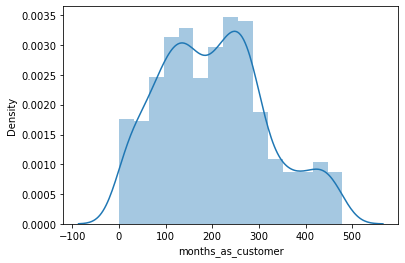

In [20]:
sns.distplot(df['months_as_customer'], kde = True, hist = True)
plt.show()

#### Months as customer has skewed

In [21]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [22]:
m = df.groupby('months_as_customer')['fraud_reported'].value_counts()
m

months_as_customer  fraud_reported
0                   N                 1
1                   N                 3
2                   N                 2
3                   N                 1
                    Y                 1
                                     ..
475                 N                 2
476                 N                 1
478                 N                 1
                    Y                 1
479                 N                 2
Name: fraud_reported, Length: 532, dtype: int64

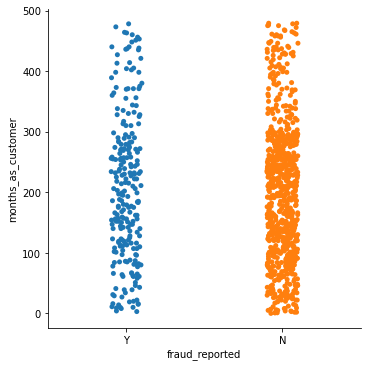

In [23]:
sns.catplot(y = 'months_as_customer', x = 'fraud_reported', data = df)
plt.show()

#### Above plot shows who is less preriod of time customer is changes of fraud is high

### Age column

In [24]:
df['age'].value_counts()

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64

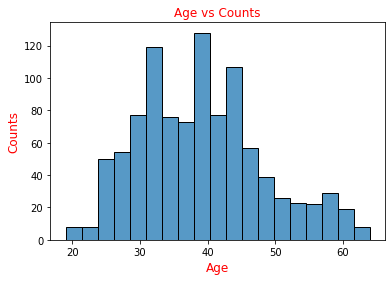

In [25]:
sns.histplot( x="age", data=df)
plt.xlabel('Age', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12)
plt.title('Age vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Age 39 to 43 is highest counts

In [26]:
a = df.groupby('age')['fraud_reported'].value_counts().sort_values()
a

age  fraud_reported
19   Y                  1
20   N                  1
63   N                  1
22   Y                  1
62   Y                  1
                       ..
34   N                 31
40   N                 34
30   N                 36
39   N                 38
43   N                 38
Name: fraud_reported, Length: 86, dtype: int64

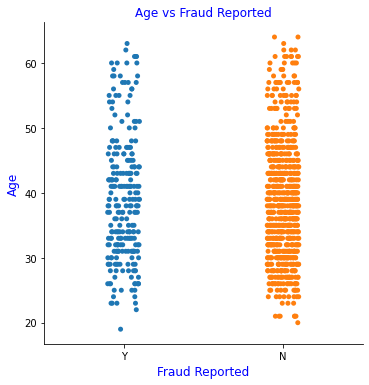

In [27]:
sns.catplot(y = 'age', x = 'fraud_reported', data = df)
plt.ylabel('Age', c = 'b', fontsize = 12)
plt.xlabel('Fraud Reported', c = 'b', fontsize = 12 )
plt.title('Age vs Fraud Reported', c = 'b', fontsize = 12)
plt.show()

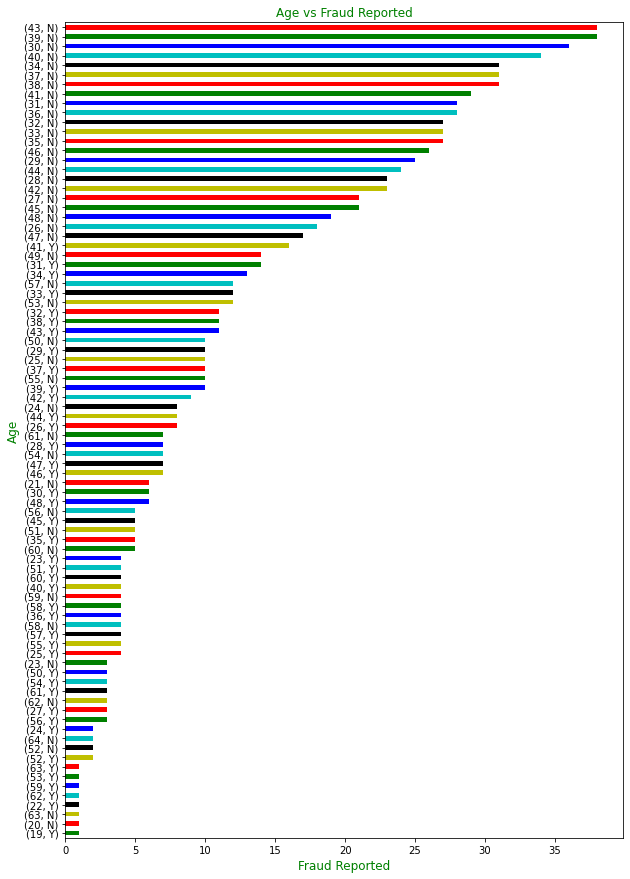

In [28]:
a.plot.barh(figsize = (10,15), rot = 360, color = ['g','r','y','k','c','b'])
plt.ylabel('Age', c = 'g', fontsize = 12)
plt.xlabel('Fraud Reported', c = 'g', fontsize = 12 )
plt.title('Age vs Fraud Reported', c = 'g', fontsize = 12)
plt.show()

#### Age group 31 to 41 highest Fraud Reported

### Policy State

In [29]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

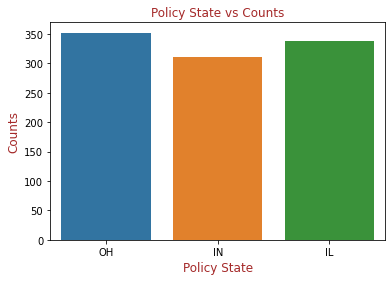

In [30]:
sns.countplot( x="policy_state", data=df)
plt.xlabel('Policy State', c = 'brown', fontsize = 12)
plt.ylabel('Counts', c = 'brown', fontsize = 12)
plt.title('Policy State vs Counts', c = 'brown', fontsize = 12)
plt.show()

#### OH highest counts

### Policy Deductable

In [31]:
df['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

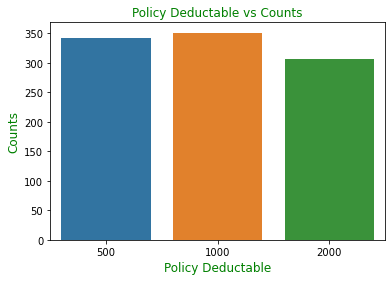

In [32]:
sns.countplot( x="policy_deductable", data=df)
plt.xlabel('Policy Deductable', c = 'g', fontsize = 12)
plt.ylabel('Counts', c = 'g', fontsize = 12)
plt.title('Policy Deductable vs Counts', c = 'g', fontsize = 12)
plt.show()

#### 1000 policy deductable highest counts

### Insured Sex Columns

In [33]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

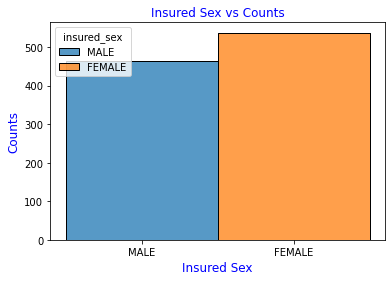

In [34]:
sns.histplot(binwidth=0.5, x="insured_sex", hue="insured_sex", data=df, stat="count", multiple="stack")
plt.xlabel('Insured Sex', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Insured Sex vs Counts', c = 'b', fontsize = 12)
plt.show()

#### Female is highest in counts

In [35]:
s = df.groupby('insured_sex')['fraud_reported'].value_counts()
s

insured_sex  fraud_reported
FEMALE       N                 411
             Y                 126
MALE         N                 342
             Y                 121
Name: fraud_reported, dtype: int64

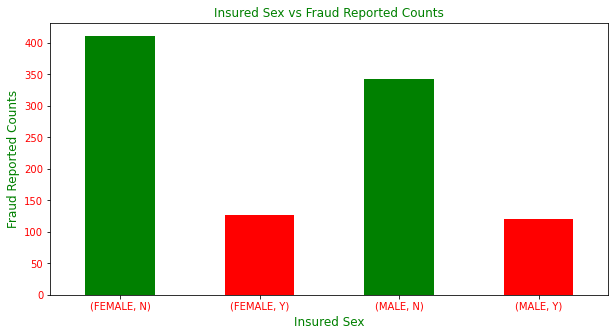

In [36]:
s.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Insured Sex', c = 'g', fontsize = 12)
plt.ylabel('Fraud Reported Counts', c = 'g', fontsize = 12 )
plt.title('Insured Sex vs Fraud Reported Counts', c = 'g', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

#### In female highest no of fraud reported

### Insured Education Level counts

In [37]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

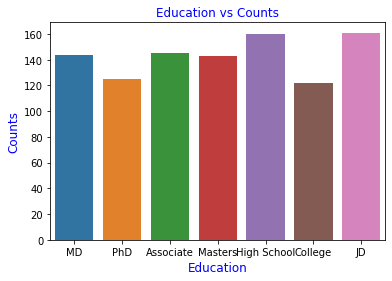

In [38]:
sns.countplot( x="insured_education_level", data=df)
plt.xlabel('Education', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Education vs Counts', c = 'b', fontsize = 12)
plt.show()

#### In education JD is highest counts

In [39]:
e = df.groupby('insured_education_level')['fraud_reported'].value_counts()
e

insured_education_level  fraud_reported
Associate                N                 111
                         Y                  34
College                  N                  90
                         Y                  32
High School              N                 124
                         Y                  36
JD                       N                 119
                         Y                  42
MD                       N                 106
                         Y                  38
Masters                  N                 111
                         Y                  32
PhD                      N                  92
                         Y                  33
Name: fraud_reported, dtype: int64

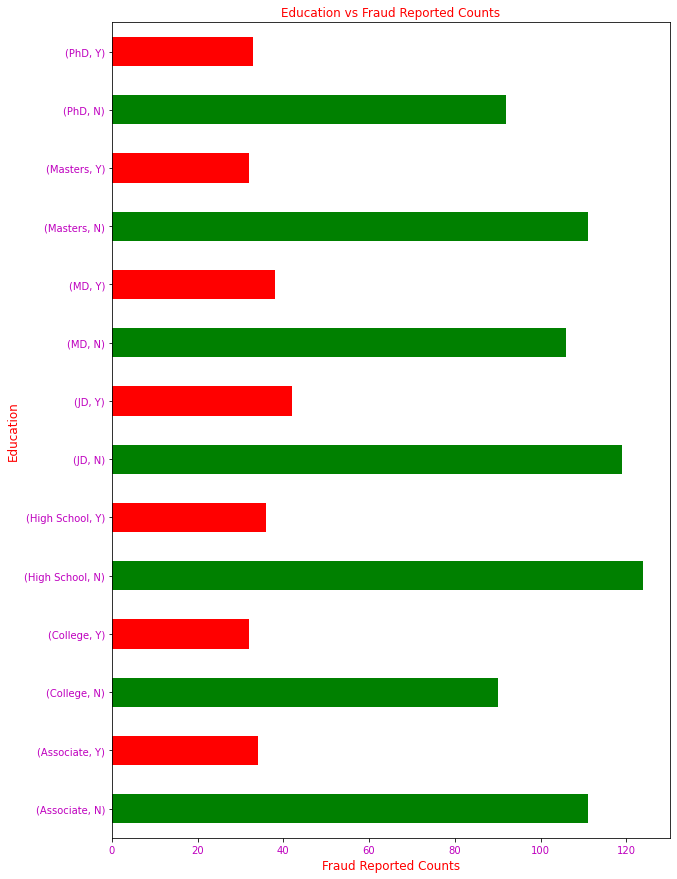

In [40]:
e.plot.barh(figsize = (10,15), color = ['g','r'])
plt.ylabel('Education', c = 'r', fontsize = 12)
plt.xlabel('Fraud Reported Counts', c = 'r', fontsize = 12 )
plt.title('Education vs Fraud Reported Counts', c = 'r', fontsize = 12)
plt.xticks(c = 'm')
plt.yticks(c = 'm')
plt.show()

#### JD has highest fraud reported

### Insured Occupation Columns

In [41]:
o = df['insured_occupation'].value_counts()
o

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

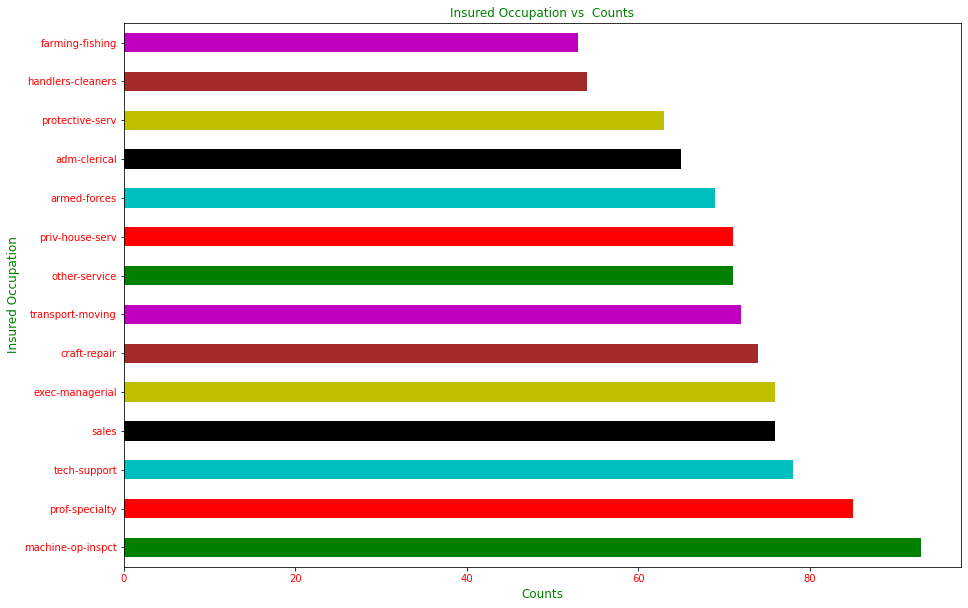

In [42]:
o.plot.barh( figsize = (15,10),  color = ['g','r','c','k','y', 'brown', 'm'])
plt.xlabel('Counts', c = 'g', fontsize = 12)
plt.ylabel('Insured Occupation', c = 'g', fontsize = 12 )
plt.title('Insured Occupation vs  Counts', c = 'g', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

#### Machine-op-inspct highest counts

In [43]:
op = df.groupby('insured_occupation')['fraud_reported'].value_counts()
op

insured_occupation  fraud_reported
adm-clerical        N                 54
                    Y                 11
armed-forces        N                 52
                    Y                 17
craft-repair        N                 52
                    Y                 22
exec-managerial     N                 48
                    Y                 28
farming-fishing     N                 37
                    Y                 16
handlers-cleaners   N                 43
                    Y                 11
machine-op-inspct   N                 71
                    Y                 22
other-service       N                 59
                    Y                 12
priv-house-serv     N                 59
                    Y                 12
prof-specialty      N                 67
                    Y                 18
protective-serv     N                 49
                    Y                 14
sales               N                 55
                    Y 

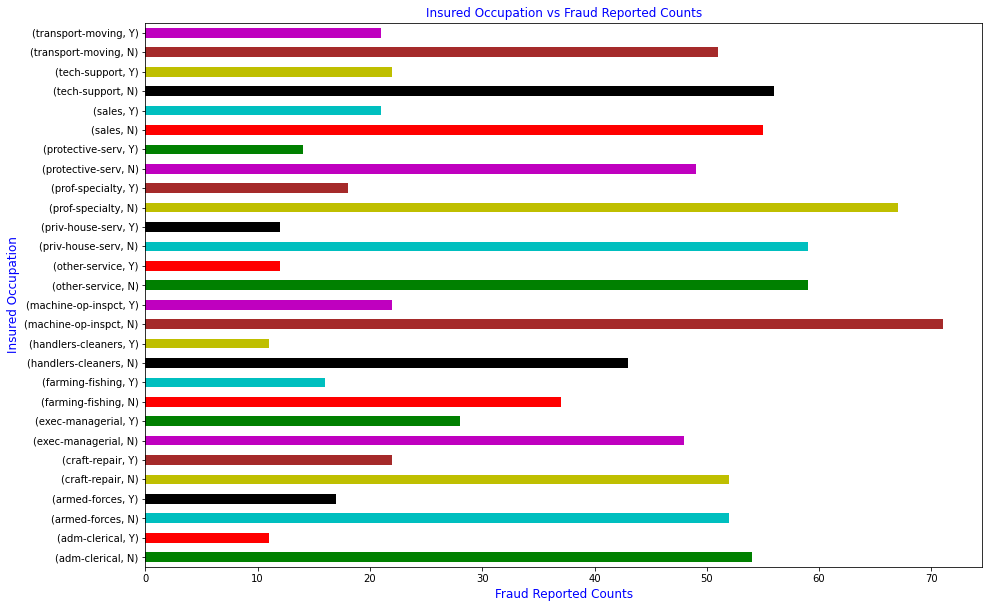

In [44]:
op.plot.barh(figsize = (15,10),color = ['g','r','c','k','y', 'brown', 'm'])
plt.ylabel('Insured Occupation', c = 'b', fontsize = 12)
plt.xlabel('Fraud Reported Counts', c = 'b', fontsize = 12 )
plt.title('Insured Occupation vs Fraud Reported Counts', c = 'b', fontsize = 12)
plt.show()

#### Exec-managerial occupation has highest fraud reported counts

### Insured Hobbies Columns

In [45]:
h = df['insured_hobbies'].value_counts()
h

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

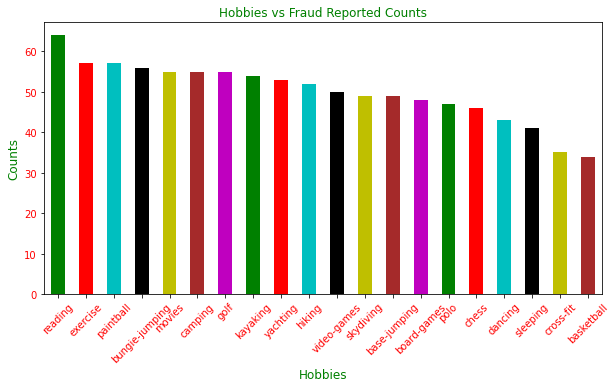

In [46]:
h.plot.bar(figsize = (10,5), rot = 45, color = ['g','r','c','k','y', 'brown', 'm'])
plt.xlabel('Hobbies', c = 'g', fontsize = 12)
plt.ylabel('Counts', c = 'g', fontsize = 12 )
plt.title('Hobbies vs Fraud Reported Counts', c = 'g', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

#### Reading is highest hobbies

### Insured Relationship Column

In [47]:
r = df['insured_relationship'].value_counts()
r

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

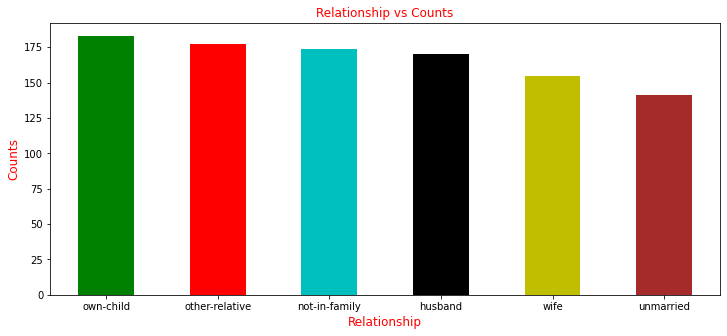

In [48]:
r.plot.bar(figsize = (12,5), rot = 360, color = ['g','r','c','k','y', 'brown', 'm'])
plt.xlabel('Relationship', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12)
plt.title('Relationship vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Own child has highest counts

In [49]:
re = df.groupby('insured_relationship')['fraud_reported'].value_counts()
re

insured_relationship  fraud_reported
husband               N                 135
                      Y                  35
not-in-family         N                 129
                      Y                  45
other-relative        N                 125
                      Y                  52
own-child             N                 144
                      Y                  39
unmarried             N                 107
                      Y                  34
wife                  N                 113
                      Y                  42
Name: fraud_reported, dtype: int64

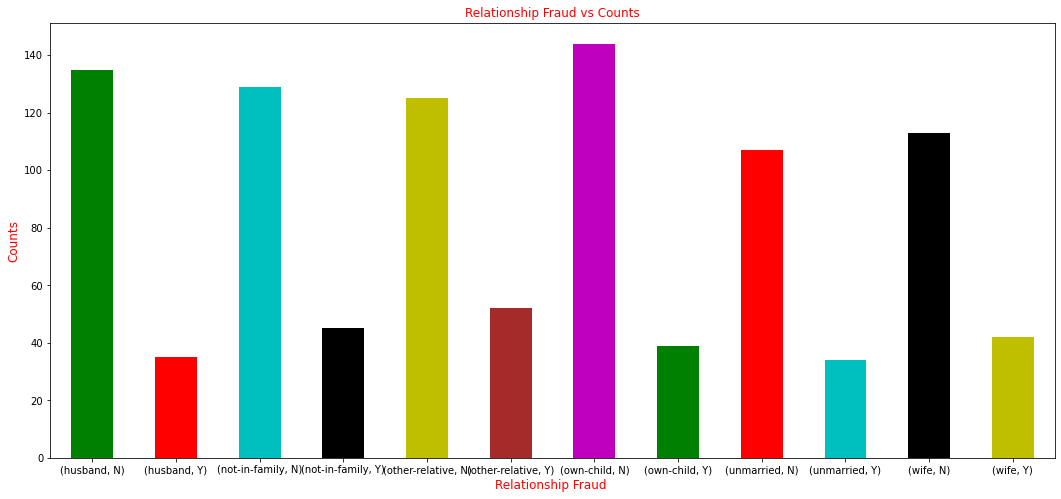

In [50]:
re.plot.bar(figsize = (18,8), rot = 360, color = ['g','r','c','k','y', 'brown', 'm'])
plt.xlabel('Relationship Fraud ', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12)
plt.title('Relationship Fraud vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Other relative highest fraud counts

### Capital Gains Column

In [51]:
df['capital-gains'].value_counts()

0        508
46300      5
68500      4
51500      4
45500      3
        ... 
54700      1
40100      1
33200      1
37300      1
72700      1
Name: capital-gains, Length: 338, dtype: int64

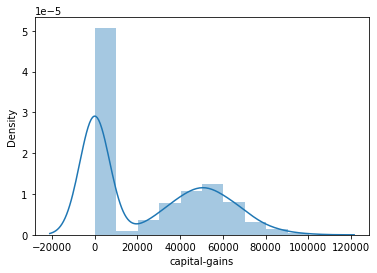

In [52]:
sns.distplot(df['capital-gains'], kde = True, hist = True)
plt.show()

#### Capital Gains has skwed

### Capital Loss Column

In [53]:
df['capital-loss'].value_counts()

 0        475
-53700      5
-50300      5
-31700      5
-51000      4
         ... 
-43300      1
-66100      1
-55900      1
-66500      1
-48000      1
Name: capital-loss, Length: 354, dtype: int64

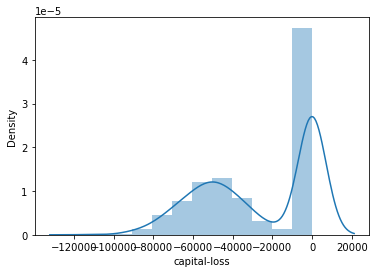

In [54]:
sns.distplot(df['capital-loss'], kde = True, hist = True)
plt.show()

#### Capital loss has skwed

### Incident Type Column

In [55]:
i = df['incident_type'].value_counts()
i

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

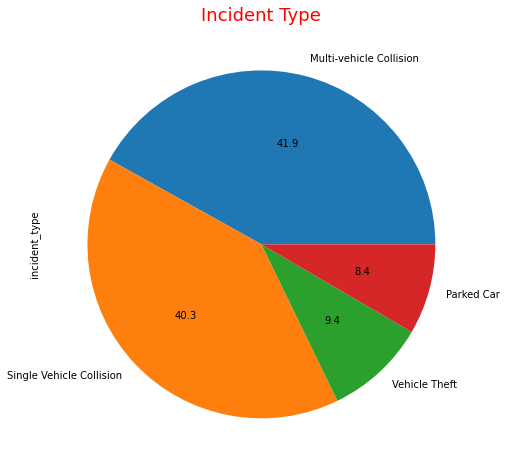

In [56]:
i.plot.pie(figsize = (8,8),autopct = '%.1f')
plt.title('Incident Type', c = 'r', fontsize = 18)
plt.show()

#### Multi Vehicle Collision Highest Counts

In [57]:
ig = df.groupby('incident_type')['fraud_reported'].value_counts()
ig

incident_type             fraud_reported
Multi-vehicle Collision   N                 305
                          Y                 114
Parked Car                N                  76
                          Y                   8
Single Vehicle Collision  N                 286
                          Y                 117
Vehicle Theft             N                  86
                          Y                   8
Name: fraud_reported, dtype: int64

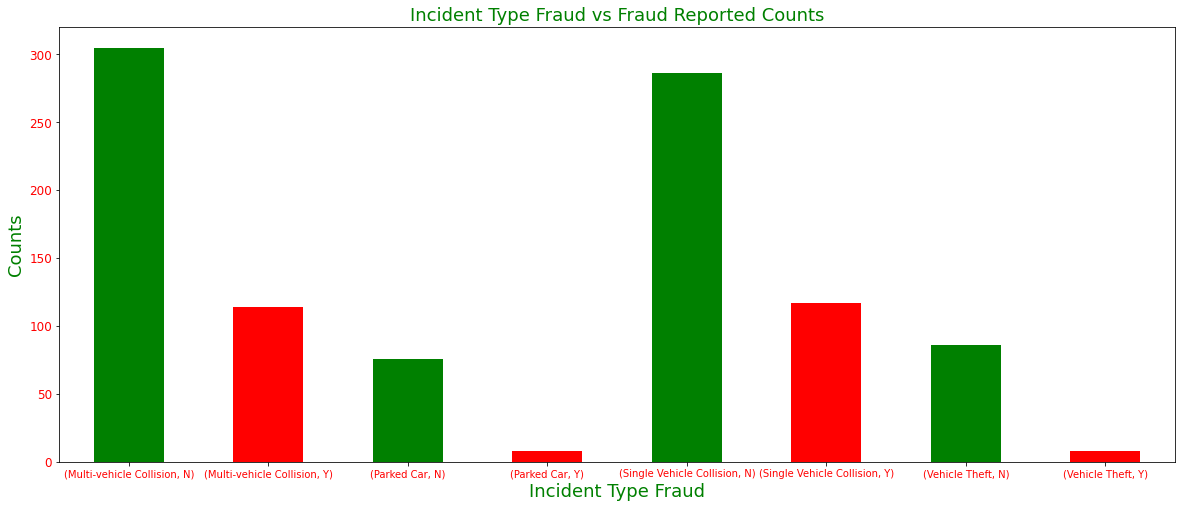

In [58]:
ig.plot.bar(figsize = (20,8), rot = 360, color = ['g','r'])
plt.xlabel('Incident Type Fraud', c = 'g', fontsize = 18)
plt.ylabel('Counts', c = 'g', fontsize = 18 )
plt.title('Incident Type Fraud vs Fraud Reported Counts', c = 'g', fontsize = 18)
plt.xticks(c = 'r', fontsize = 10)
plt.yticks(c = 'r', fontsize = 12)
plt.show()

#### Single Vehicle Collision Highest Fraud Counts

### Collision Type Counts

In [59]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

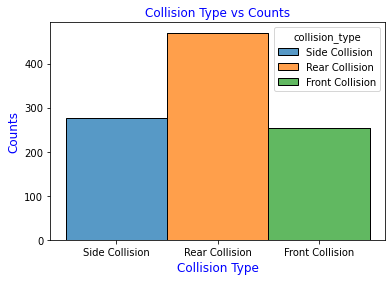

In [60]:
sns.histplot(binwidth=0.5, x="collision_type", hue="collision_type", data=df, stat="count", multiple="stack")
plt.xlabel('Collision Type', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Collision Type vs Counts', c = 'b', fontsize = 12)
plt.show()

#### Rear Collision Has Highest Counts

In [61]:
ct = df.groupby('collision_type')['fraud_reported'].value_counts()
ct

collision_type   fraud_reported
Front Collision  N                 184
                 Y                  70
Rear Collision   N                 363
                 Y                 107
Side Collision   N                 206
                 Y                  70
Name: fraud_reported, dtype: int64

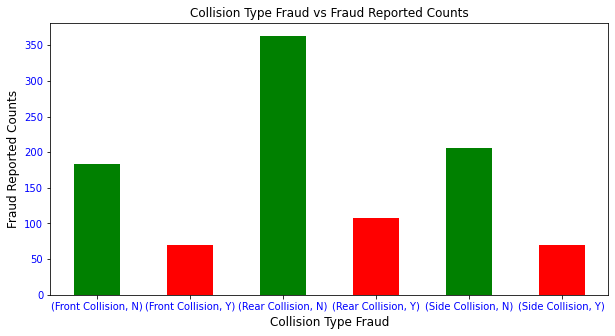

In [62]:
ct.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Collision Type Fraud', c = 'k', fontsize = 12)
plt.ylabel('Fraud Reported Counts', c = 'k', fontsize = 12 )
plt.title('Collision Type Fraud vs Fraud Reported Counts', c = 'k', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### Rear Collision Has Highest Fraud Reported Counts

### Authorities Contacted Column

In [63]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

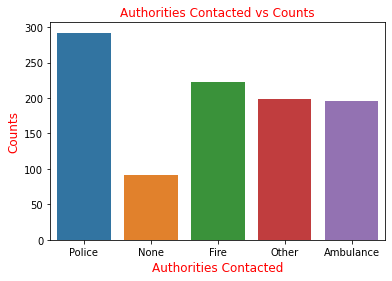

In [64]:
sns.countplot(x="authorities_contacted", data=df)
plt.xlabel('Authorities Contacted', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12)
plt.title('Authorities Contacted vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Police Has Highest Counts

In [65]:
au = df.groupby('authorities_contacted')['fraud_reported'].value_counts()
au

authorities_contacted  fraud_reported
Ambulance              N                 139
                       Y                  57
Fire                   N                 163
                       Y                  60
None                   N                  85
                       Y                   6
Other                  N                 135
                       Y                  63
Police                 N                 231
                       Y                  61
Name: fraud_reported, dtype: int64

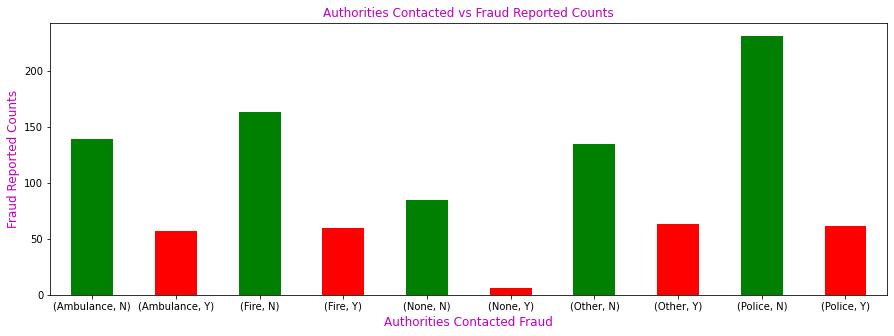

In [66]:
au.plot.bar(figsize = (15,5), rot = 360, color = ['g','r'])
plt.xlabel('Authorities Contacted Fraud', c = 'm', fontsize = 12)
plt.ylabel('Fraud Reported Counts', c = 'm', fontsize = 12 )
plt.title('Authorities Contacted vs Fraud Reported Counts', c = 'm', fontsize = 12)
plt.show()

#### Other has highest no of fraud reported

### Incident State Column

In [67]:
ist =df['incident_state'].value_counts()
ist

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

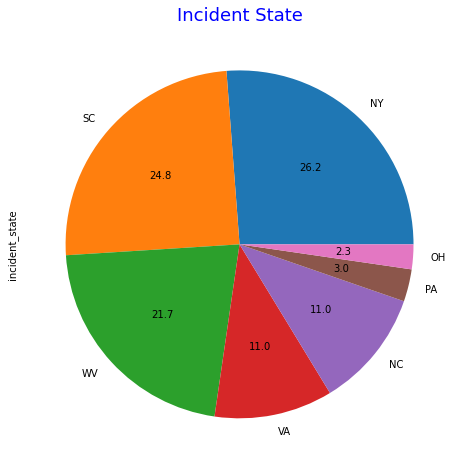

In [68]:
ist.plot.pie(figsize = (8,8),autopct = '%.1f')
plt.title('Incident State', c ='b', fontsize = 18)
plt.show()

#### NY state has highest counts

In [69]:
sf = df.groupby('incident_state')['fraud_reported'].value_counts()
sf

incident_state  fraud_reported
NC              N                  76
                Y                  34
NY              N                 204
                Y                  58
OH              N                  13
                Y                  10
PA              N                  22
                Y                   8
SC              N                 175
                Y                  73
VA              N                  85
                Y                  25
WV              N                 178
                Y                  39
Name: fraud_reported, dtype: int64

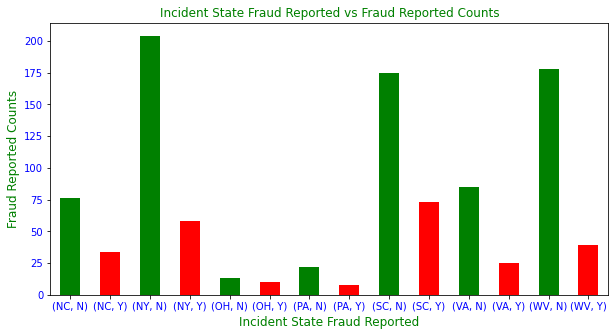

In [70]:
sf.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Incident State Fraud Reported', c = 'g', fontsize = 12)
plt.ylabel('Fraud Reported Counts', c = 'g', fontsize = 12 )
plt.title('Incident State Fraud Reported vs Fraud Reported Counts', c = 'g', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### SC state highest fraud reported counts

### Incident City Column

In [71]:
ic = df['incident_city'].value_counts()
ic

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

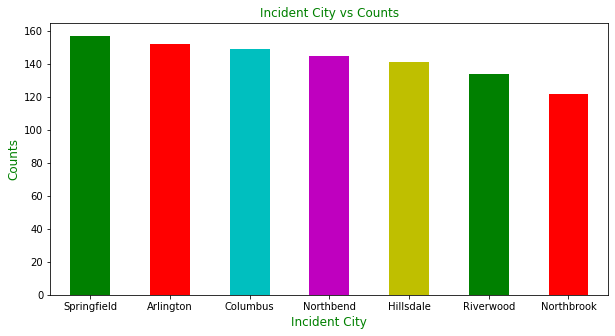

In [72]:
ic.plot.bar(figsize = (10,5), rot = 360, color = ['g','r','c','m','y'])
plt.xlabel('Incident City', c = 'g', fontsize = 12)
plt.ylabel('Counts', c = 'g', fontsize = 12 )
plt.title('Incident City vs Counts', c = 'g', fontsize = 12)
plt.show()

#### Springfield City has highest counts

In [73]:
c = df.groupby('incident_city')['fraud_reported'].value_counts()
c

incident_city  fraud_reported
Arlington      N                 108
               Y                  44
Columbus       N                 110
               Y                  39
Hillsdale      N                 106
               Y                  35
Northbend      N                 111
               Y                  34
Northbrook     N                  95
               Y                  27
Riverwood      N                 104
               Y                  30
Springfield    N                 119
               Y                  38
Name: fraud_reported, dtype: int64

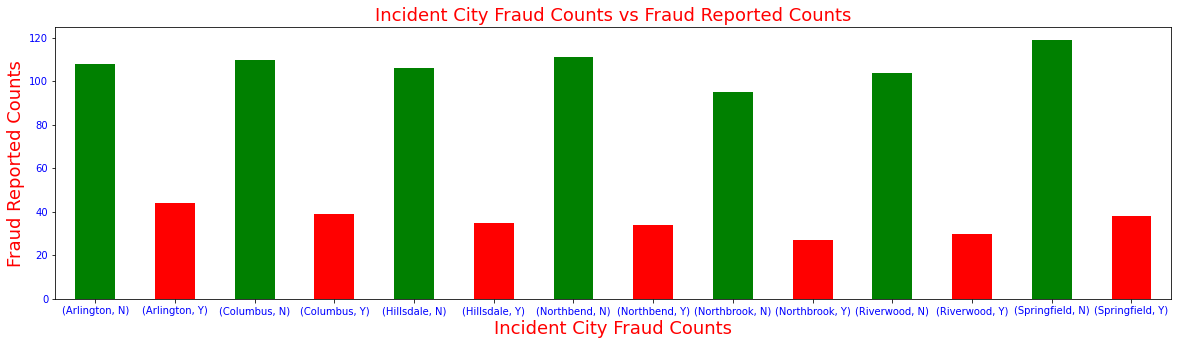

In [74]:
c.plot.bar(figsize = (20,5), rot = 360, color = ['g','r'])
plt.xlabel('Incident City Fraud Counts', c = 'r', fontsize = 18)
plt.ylabel('Fraud Reported Counts', c = 'r', fontsize = 18 )
plt.title('Incident City Fraud Counts vs Fraud Reported Counts', c = 'r', fontsize = 18)
plt.xticks(c = 'b', fontsize = 10)
plt.yticks(c = 'b', fontsize = 10)
plt.show()

#### Arlington city highest fraud reported counts

### Incident Hour Of The Day Column

In [75]:
df['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
10    46
13    46
6     44
14    43
9     43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

In [76]:
hr = df.groupby('incident_hour_of_the_day')['fraud_reported'].value_counts().sort_values()
hr

incident_hour_of_the_day  fraud_reported
9                         Y                  4
22                        Y                  5
8                         Y                  6
12                        Y                  8
7                         Y                  8
13                        Y                  8
17                        Y                  8
4                         Y                  8
1                         Y                  8
19                        Y                  9
20                        Y                  9
5                         Y                  9
2                         Y                 10
21                        Y                 10
0                         Y                 12
3                         Y                 12
11                        Y                 12
15                        Y                 13
18                        Y                 14
23                        Y                 14
6                  

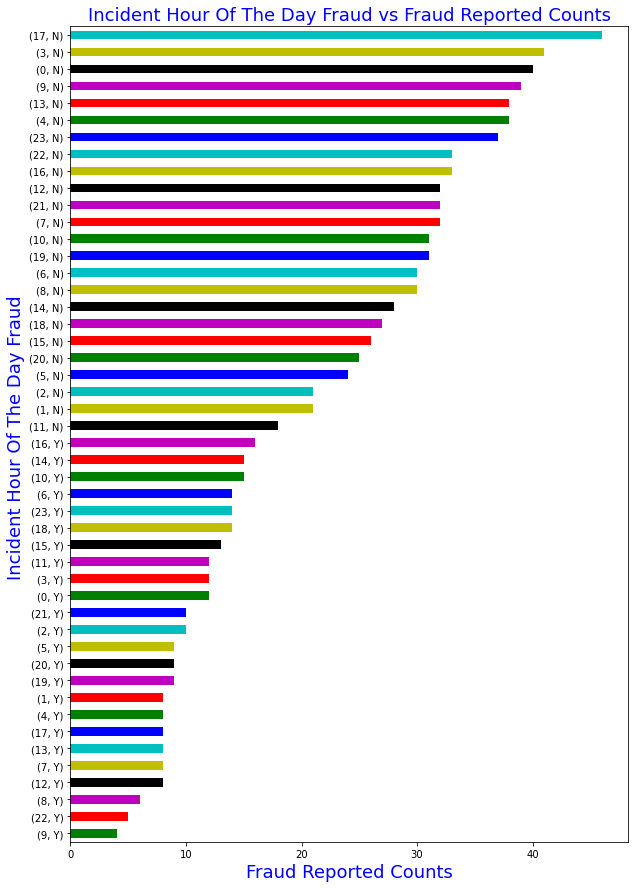

In [77]:
hr.plot.barh(figsize = (10,15), rot = 360, color = ['g','r','m','k','y','c','b'])
plt.ylabel('Incident Hour Of The Day Fraud ', c = 'b', fontsize = 18)
plt.xlabel('Fraud Reported Counts', c = 'b', fontsize = 18 )
plt.title('Incident Hour Of The Day Fraud vs Fraud Reported Counts', c = 'b', fontsize = 18)
plt.show()

#### In a day highest 16 fraud case reported

### Number Of Vehicles Involved Column

In [78]:
df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

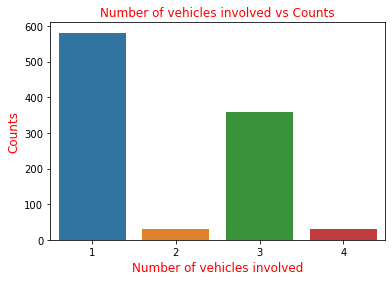

In [79]:
sns.countplot( x="number_of_vehicles_involved", data=df)
plt.xlabel('Number of vehicles involved', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12)
plt.title('Number of vehicles involved vs Counts', c = 'r', fontsize = 12)
plt.show()

#### One vehicles involved fraud case highest

In [80]:
v = df.groupby('number_of_vehicles_involved')['fraud_reported'].value_counts()
v

number_of_vehicles_involved  fraud_reported
1                            N                 448
                             Y                 133
2                            N                  21
                             Y                   9
3                            N                 264
                             Y                  94
4                            N                  20
                             Y                  11
Name: fraud_reported, dtype: int64

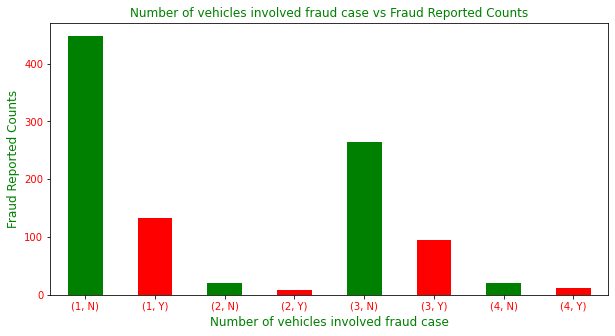

In [81]:
v.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Number of vehicles involved fraud case', c = 'g', fontsize = 12)
plt.ylabel('Fraud Reported Counts', c = 'g', fontsize = 12 )
plt.title('Number of vehicles involved fraud case vs Fraud Reported Counts', c = 'g', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

#### One vehicles involved fraud case highest

### Property Damage

In [82]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

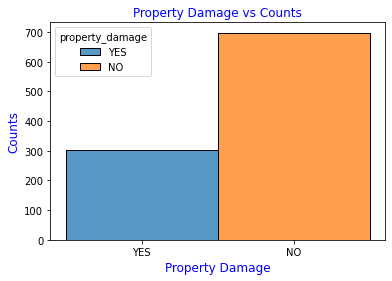

In [83]:
sns.histplot(binwidth=0.5, x="property_damage", hue="property_damage", data=df, stat="count", multiple="stack")
plt.xlabel('Property Damage', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Property Damage vs Counts', c = 'b', fontsize = 12)
plt.show()

#### Property Damage cases are low

### Bodily Injuries Column

In [84]:
df['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

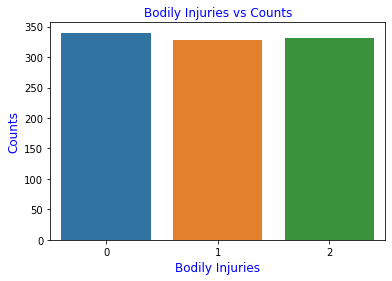

In [85]:
sns.countplot( x="bodily_injuries", data=df)
plt.xlabel('Bodily Injuries', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Bodily Injuries vs Counts', c = 'b', fontsize = 12)
plt.show()

#### Zero has highest counts

### Witnesses Column

In [86]:
df['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

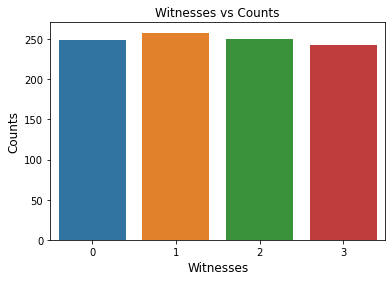

In [87]:
sns.countplot( x="witnesses", data=df)
plt.xlabel('Witnesses', c = 'k', fontsize = 12)
plt.ylabel('Counts', c = 'k', fontsize = 12)
plt.title('Witnesses vs Counts', c = 'k', fontsize = 12)
plt.show()

#### One witnesses counts is highest

### Total Claim Amount Column

In [88]:
print('Maximum Claim Amount------------>',df['total_claim_amount'].max())

Maximum Claim Amount------------> 114920


In [89]:
print('Minimum Claim Amount------------>',df['total_claim_amount'].min())

Minimum Claim Amount------------> 100


### Injury Claim Column

In [90]:
print('Maximum Injury Claim Amount------------>',df['injury_claim'].max())

Maximum Injury Claim Amount------------> 21450


In [91]:
print('Minimum Injury Claim Amount------------>',df['injury_claim'].min())

Minimum Injury Claim Amount------------> 0


### Property Claim Column

In [92]:
print('Maximum Property Claim ------------>',df['property_claim'].max())

Maximum Property Claim ------------> 23670


In [93]:
print('Minimum Property Claim ------------>',df['property_claim'].min())

Minimum Property Claim ------------> 0


### Vehicle Claim Column

In [94]:
print('Maximum Vehicle Claim ------------>',df['vehicle_claim'].max())

Maximum Vehicle Claim ------------> 79560


In [95]:
print('Minimum Vehicle Claim ------------>',df['vehicle_claim'].min())

Minimum Vehicle Claim ------------> 70


### Auto Make Column

In [96]:
au = df['auto_make'].value_counts()
au

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

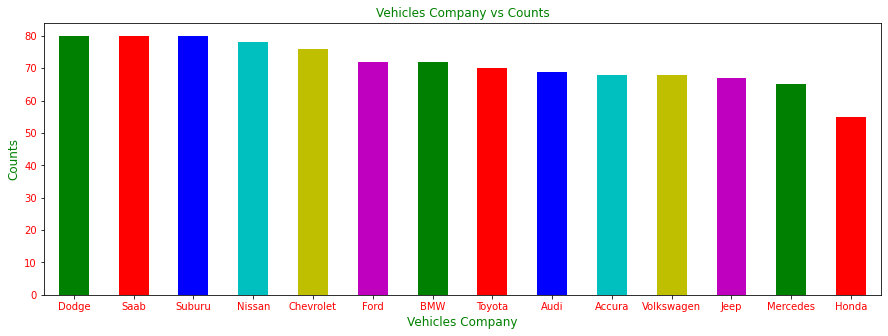

In [97]:
au.plot.bar(figsize = (15,5), rot = 360, color = ['g','r','b','c','y','m'])
plt.xlabel('Vehicles Company', c = 'g', fontsize = 12)
plt.ylabel('Counts', c = 'g', fontsize = 12 )
plt.title('Vehicles Company vs Counts', c = 'g', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

#### Dodge is highest counts and Honda is lowest

In [98]:
am = df.groupby('auto_make')['fraud_reported'].value_counts().sort_values()
am

auto_make   fraud_reported
Jeep        Y                 11
Accura      Y                 13
Toyota      Y                 13
Honda       Y                 14
Nissan      Y                 14
Saab        Y                 18
Suburu      Y                 19
Volkswagen  Y                 19
Dodge       Y                 20
BMW         Y                 20
Audi        Y                 21
Chevrolet   Y                 21
Mercedes    Y                 22
Ford        Y                 22
Honda       N                 41
Mercedes    N                 43
Audi        N                 48
Volkswagen  N                 49
Ford        N                 50
BMW         N                 52
Accura      N                 55
Chevrolet   N                 55
Jeep        N                 56
Toyota      N                 57
Dodge       N                 60
Suburu      N                 61
Saab        N                 62
Nissan      N                 64
Name: fraud_reported, dtype: int64

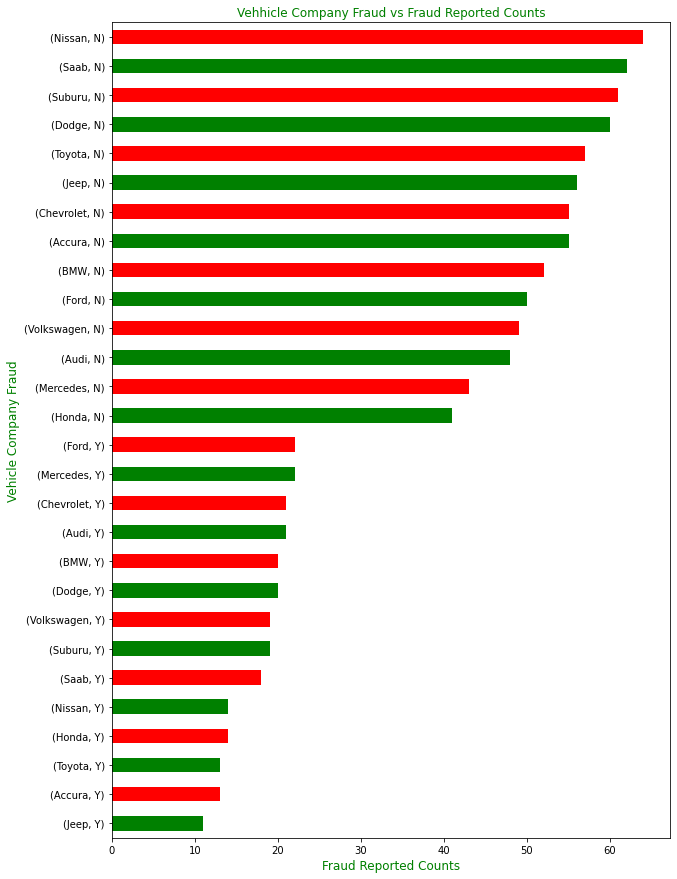

In [99]:
am.plot.barh(figsize = (10,15), rot = 360, color = ['g','r'])
plt.ylabel('Vehicle Company Fraud', c = 'g', fontsize = 12)
plt.xlabel('Fraud Reported Counts', c = 'g', fontsize = 12 )
plt.title('Vehhicle Company Fraud vs Fraud Reported Counts', c = 'g', fontsize = 12)
plt.show()

#### Mercedes and Ford has highest fraud reported 

### Auto Year Column

In [100]:
y = df['auto_year'].value_counts()
y

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

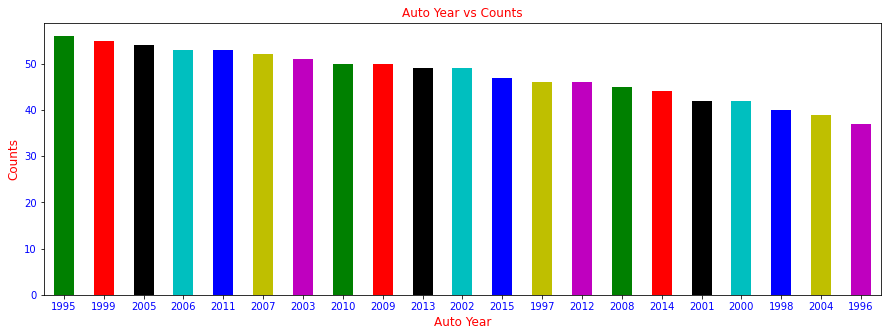

In [101]:
y.plot.bar(figsize = (15,5), rot = 360, color = ['g','r','k','c','b','y','m'])
plt.xlabel('Auto Year', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12 )
plt.title('Auto Year vs Counts', c = 'r', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### 1995 highest sell of auto

In [102]:
ay = df.groupby('auto_year')['fraud_reported'].value_counts().sort_values()
ay

auto_year  fraud_reported
2010       Y                  7
1998       Y                  7
2012       Y                  9
2003       Y                  9
2001       Y                  9
2002       Y                 10
2008       Y                 10
1999       Y                 10
2015       Y                 11
2000       Y                 11
2009       Y                 11
2014       Y                 12
1997       Y                 12
2005       Y                 12
1995       Y                 13
1996       Y                 14
2006       Y                 14
2013       Y                 15
2004       Y                 16
2011       Y                 17
2007       Y                 18
2004       N                 23
1996       N                 23
2000       N                 31
2014       N                 32
2001       N                 33
1998       N                 33
2007       N                 34
1997       N                 34
2013       N                 34
2008       N  

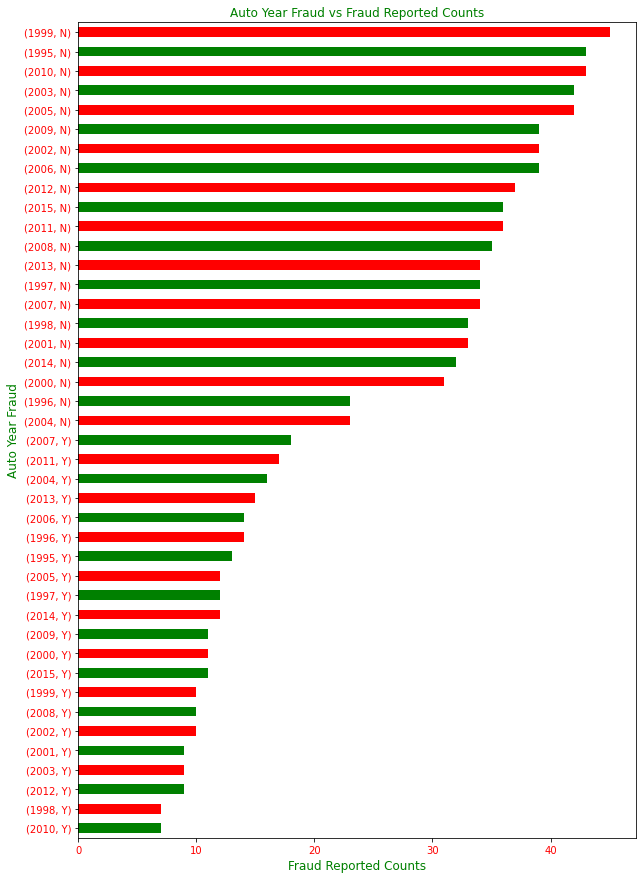

In [103]:
ay.plot.barh(figsize = (10,15), rot = 360, color = ['g','r'])
plt.ylabel('Auto Year Fraud', c = 'g', fontsize = 12)
plt.xlabel('Fraud Reported Counts', c = 'g', fontsize = 12 )
plt.title('Auto Year Fraud vs Fraud Reported Counts', c = 'g', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

#### Year 2007 highest fraud reported counts

### Incident Month & Year Column

In [104]:
df['IncidentMonth&Year'].value_counts()

01-2015    516
02-2015    472
03-2015     12
Name: IncidentMonth&Year, dtype: int64

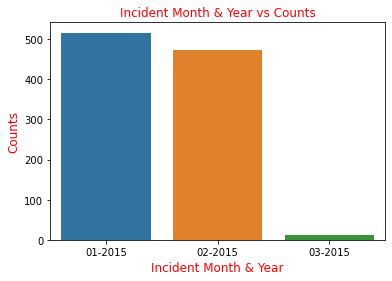

In [105]:
sns.countplot( x="IncidentMonth&Year", data=df)
plt.xlabel('Incident Month & Year', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12)
plt.title('Incident Month & Year vs Counts', c = 'r', fontsize = 12)
plt.show()

#### In 2015 first month highest incident counts

In [106]:
imy = df.groupby('IncidentMonth&Year')['fraud_reported'].value_counts()
imy

IncidentMonth&Year  fraud_reported
01-2015             N                 381
                    Y                 135
02-2015             N                 364
                    Y                 108
03-2015             N                   8
                    Y                   4
Name: fraud_reported, dtype: int64

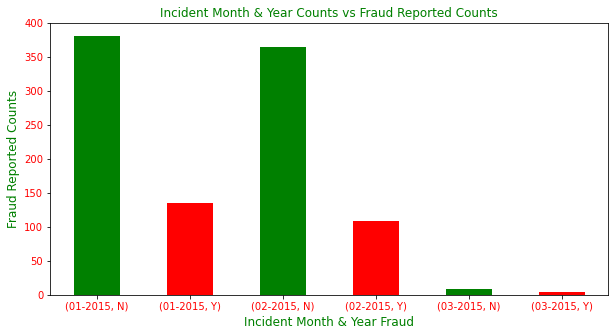

In [107]:
imy.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Incident Month & Year Fraud', c = 'g', fontsize = 12)
plt.ylabel('Fraud Reported Counts', c = 'g', fontsize = 12 )
plt.title('Incident Month & Year Counts vs Fraud Reported Counts', c = 'g', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

#### In 2015 first month highest fraud reported counts

### Drop Columns

In [108]:
col = ['policy_bind_date', 'incident_date', 'incident_location']

In [109]:
df = df.drop(col, axis = 1)
df.head(2)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,IncidentMonth&Year,PolicyBindMonth&year,Incident_Pincode
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,01-2015,10-2014,9935
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,01-2015,06-2006,6608


In [110]:
print('No of Rows and Columns after removing columns ----->', df.shape )

No of Rows and Columns after removing columns -----> (1000, 39)


### Encoding Categorical Column

In [111]:
oe = OrdinalEncoder()

In [112]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df.head(2)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,IncidentMonth&Year,PolicyBindMonth&year,Incident_Pincode
0,328,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,2.0,0.0,4.0,4.0,1.0,5,1,1.0,1,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1.0,0.0,236.0,9935
1,228,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,6.0,15.0,2.0,0,0,3.0,1.0,1.0,4.0,5.0,5.0,8,1,0.0,0,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0,0.0,135.0,6608


In [113]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   float64
 4   policy_csl                   1000 non-null   float64
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   float64
 10  insured_education_level      1000 non-null   float64
 11  insured_occupation           1000 non-null   float64
 12  insured_hobbies              1000 non-null   float64
 13  insured_relationsh

#### All categorical columns are encoded

### Data distribution

---------------------
Distribution Plot :- 
---------------------


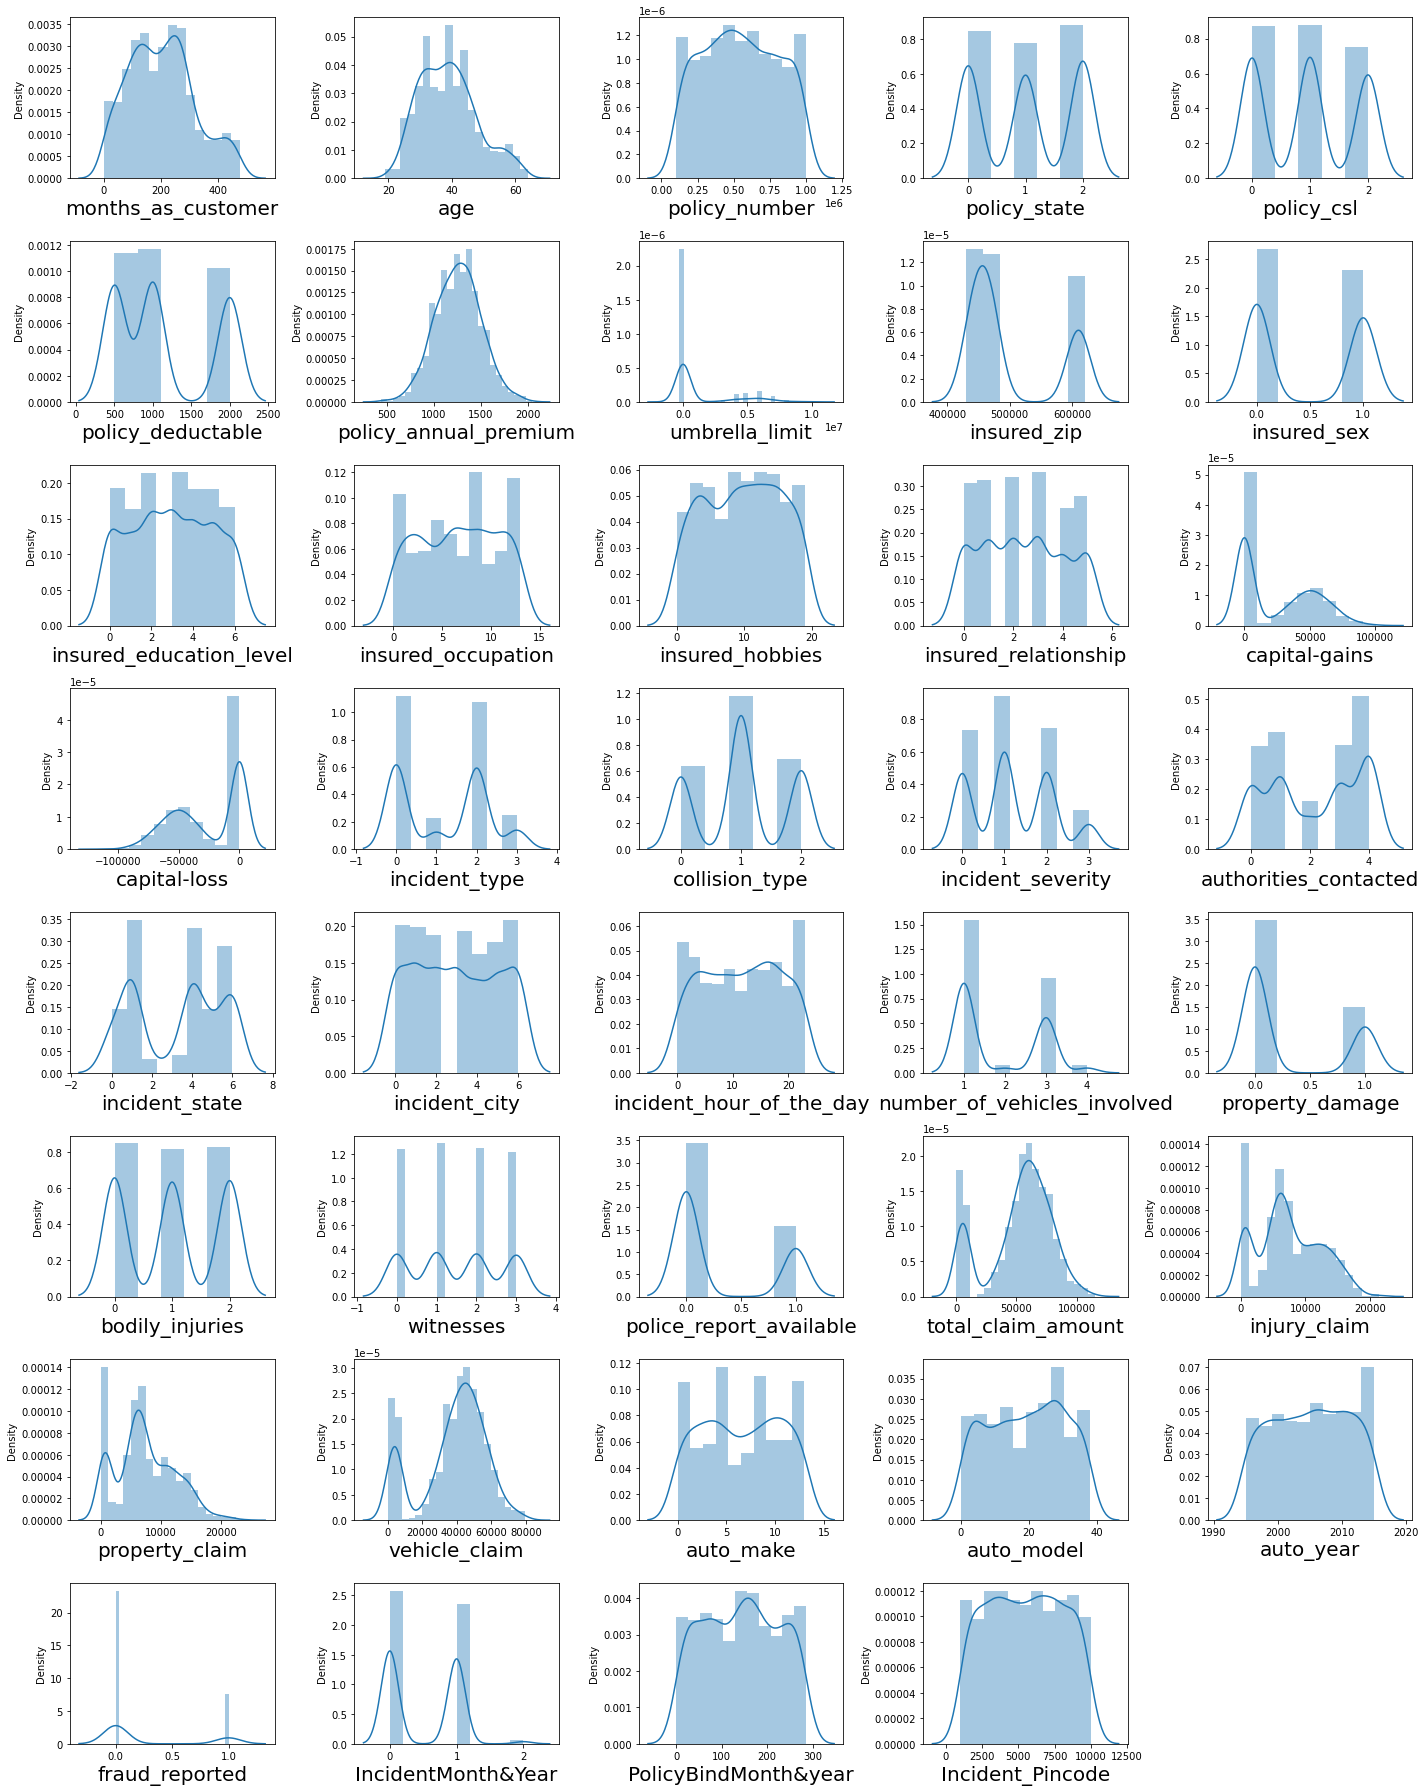

In [114]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=40:
        ax = plt.subplot(8,5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Some columns are little skewed

### Check skweness

In [115]:
print('=======================================')
print(df.skew())
print('=======================================')

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806


#### Skewness present in our dataset

### Corelation of Feature vs Label using Heat map

-----------
Heat Map :-
-----------


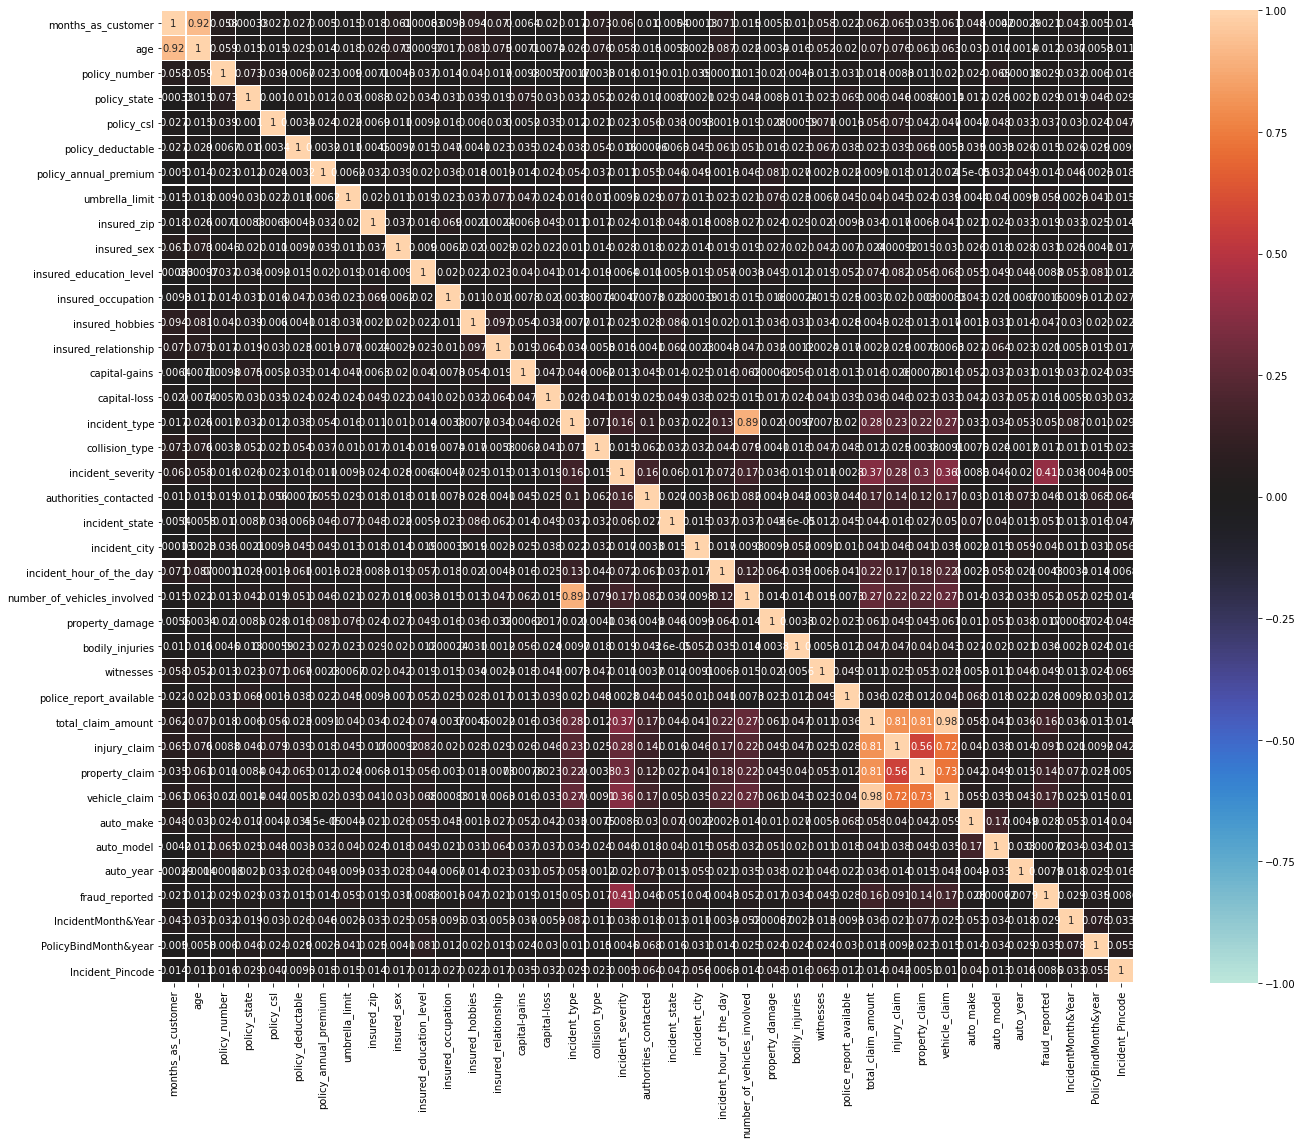

In [116]:
print('-----------')
print('Heat Map :-')
print('-----------')
df_corr = df.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1)
plt.tight_layout()

#### Vehicle Claim highest corelation

### Checking Outliers

Box Plot :-


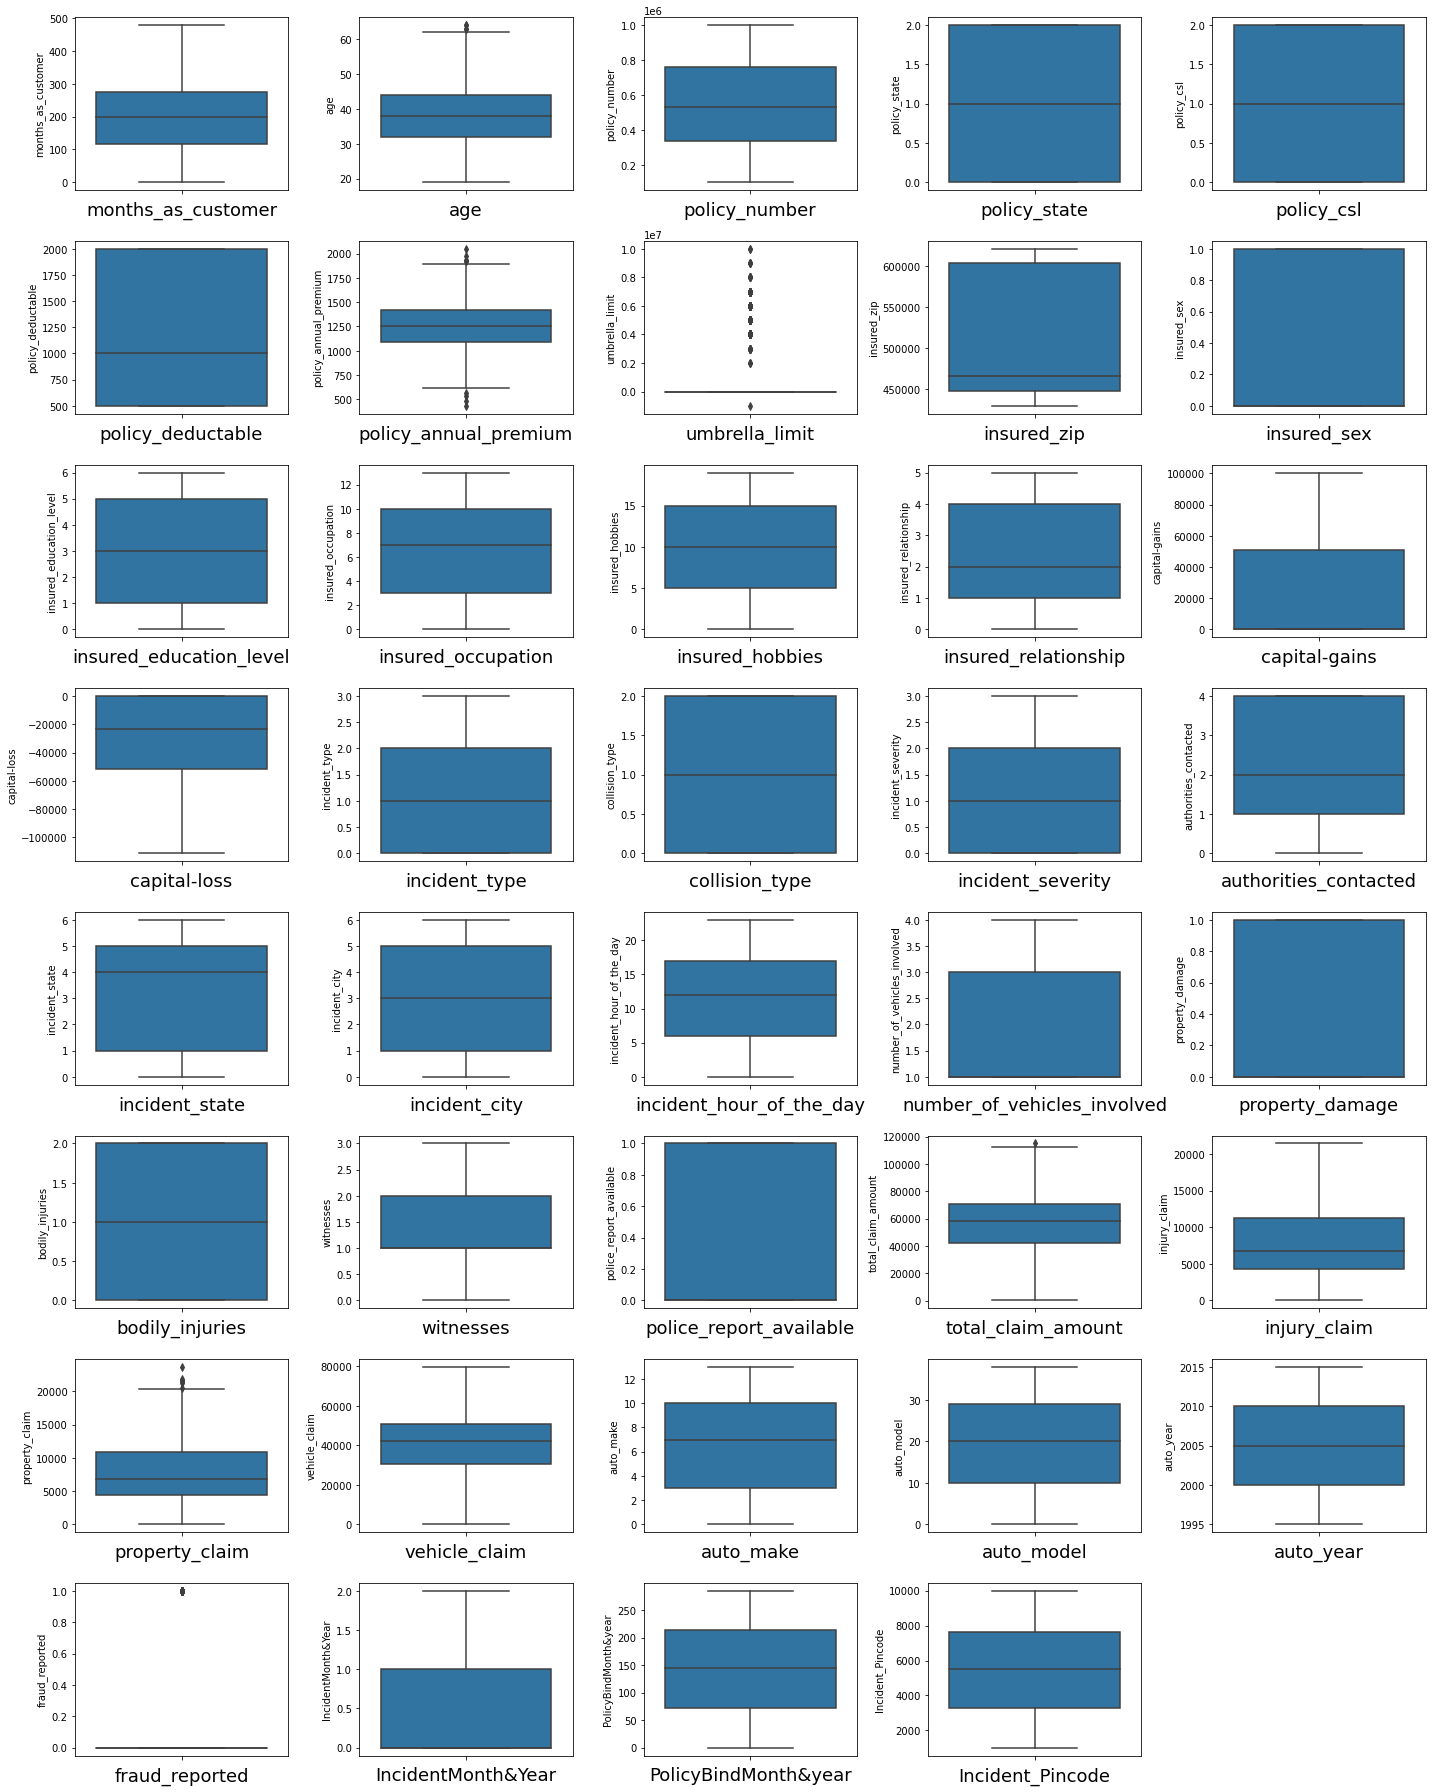

In [117]:
print('===========')
print('Box Plot :-')
print('===========')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=40:
        ax = plt.subplot(8,5, plotnumber)
        sns.boxplot(y=df[column]) # It is the axis for vertical set as y
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### There are outliers presents in dataset 

### Removing Outliers

In [118]:
# with std 3 Lets see the stats

z_score = zscore(df[['age', 'umbrella_limit', 'total_claim_amount', 'property_claim', 'policy_annual_premium']]) # use only continous data
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

df = df[filtering_entry]
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,IncidentMonth&Year,PolicyBindMonth&year,Incident_Pincode
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,9.810000e+02,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,204.594292,38.972477,545930.544343,1.020387,0.945973,1138.124363,1257.298359,9.908257e+05,500596.322120,0.464832,2.959225,6.647299,9.741081,2.418960,25344.648318,-26778.491335,1.176351,1.021407,1.183486,2.161060,3.240571,2.985729,11.677880,1.835882,0.303772,0.998981,1.483180,0.314985,52714.525994,7431.213048,7391.182467,37892.130479,6.563710,19.235474,2005.123344,0.244648,0.499490,143.858308,5491.538226
std,115.362802,9.179406,257515.314276,0.830289,0.804412,611.567198,241.462236,2.120098e+06,71369.824051,0.499016,1.953116,4.018321,5.690507,1.682687,27961.064117,28067.248619,1.080670,0.727415,0.939481,1.534153,2.157858,2.038357,6.971239,1.018491,0.460120,0.817537,1.112532,0.464747,26336.821731,4885.814228,4793.177084,18839.979463,4.030657,11.136290,6.019871,0.430098,0.524161,82.495710,2567.456669
min,0.000000,19.000000,100804.000000,0.000000,0.000000,500.000000,538.170000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,0.000000,0.000000,1012.000000
25%,116.000000,32.000000,335780.000000,0.000000,0.000000,500.000000,1088.340000,0.000000e+00,448436.000000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51400.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,41700.000000,4280.000000,4490.000000,30240.000000,3.000000,10.000000,2000.000000,0.000000,0.000000,74.000000,3288.000000
50%,200.000000,38.000000,533940.000000,1.000000,1.000000,1000.000000,1257.360000,0.000000e+00,466390.000000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-24100.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.000000,0.000000,1.000000,1.000000,0.000000,57900.000000,6770.000000,6750.000000,42080.000000,7.000000,20.000000,2005.000000,0.000000,0.000000,146.000000,5506.000000
75%,278.000000,44.000000,760179.000000,2.000000,2.000000,2000.000000,1415.740000,0.000000e+00,602942.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51100.000000,0.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,17.000000,3.000000,1.000000,2.000000,2.000000,1.000000,70500.000000,11280.000000,10860.000000,50720.000000,10.000000,29.000000,2010.000000,0.000000,1.000000,214.000000,7684.000000
max,479.000000,64.000000,999435.000000,2.000000,2.000000,2000.000000,1969.630000,7.000000e+06,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.000000,1.000000,2.000000,3.000000,1.000000,114920.000000,21450.000000,21810.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,2.000000,285.000000,9988.000000


Box Plot :-


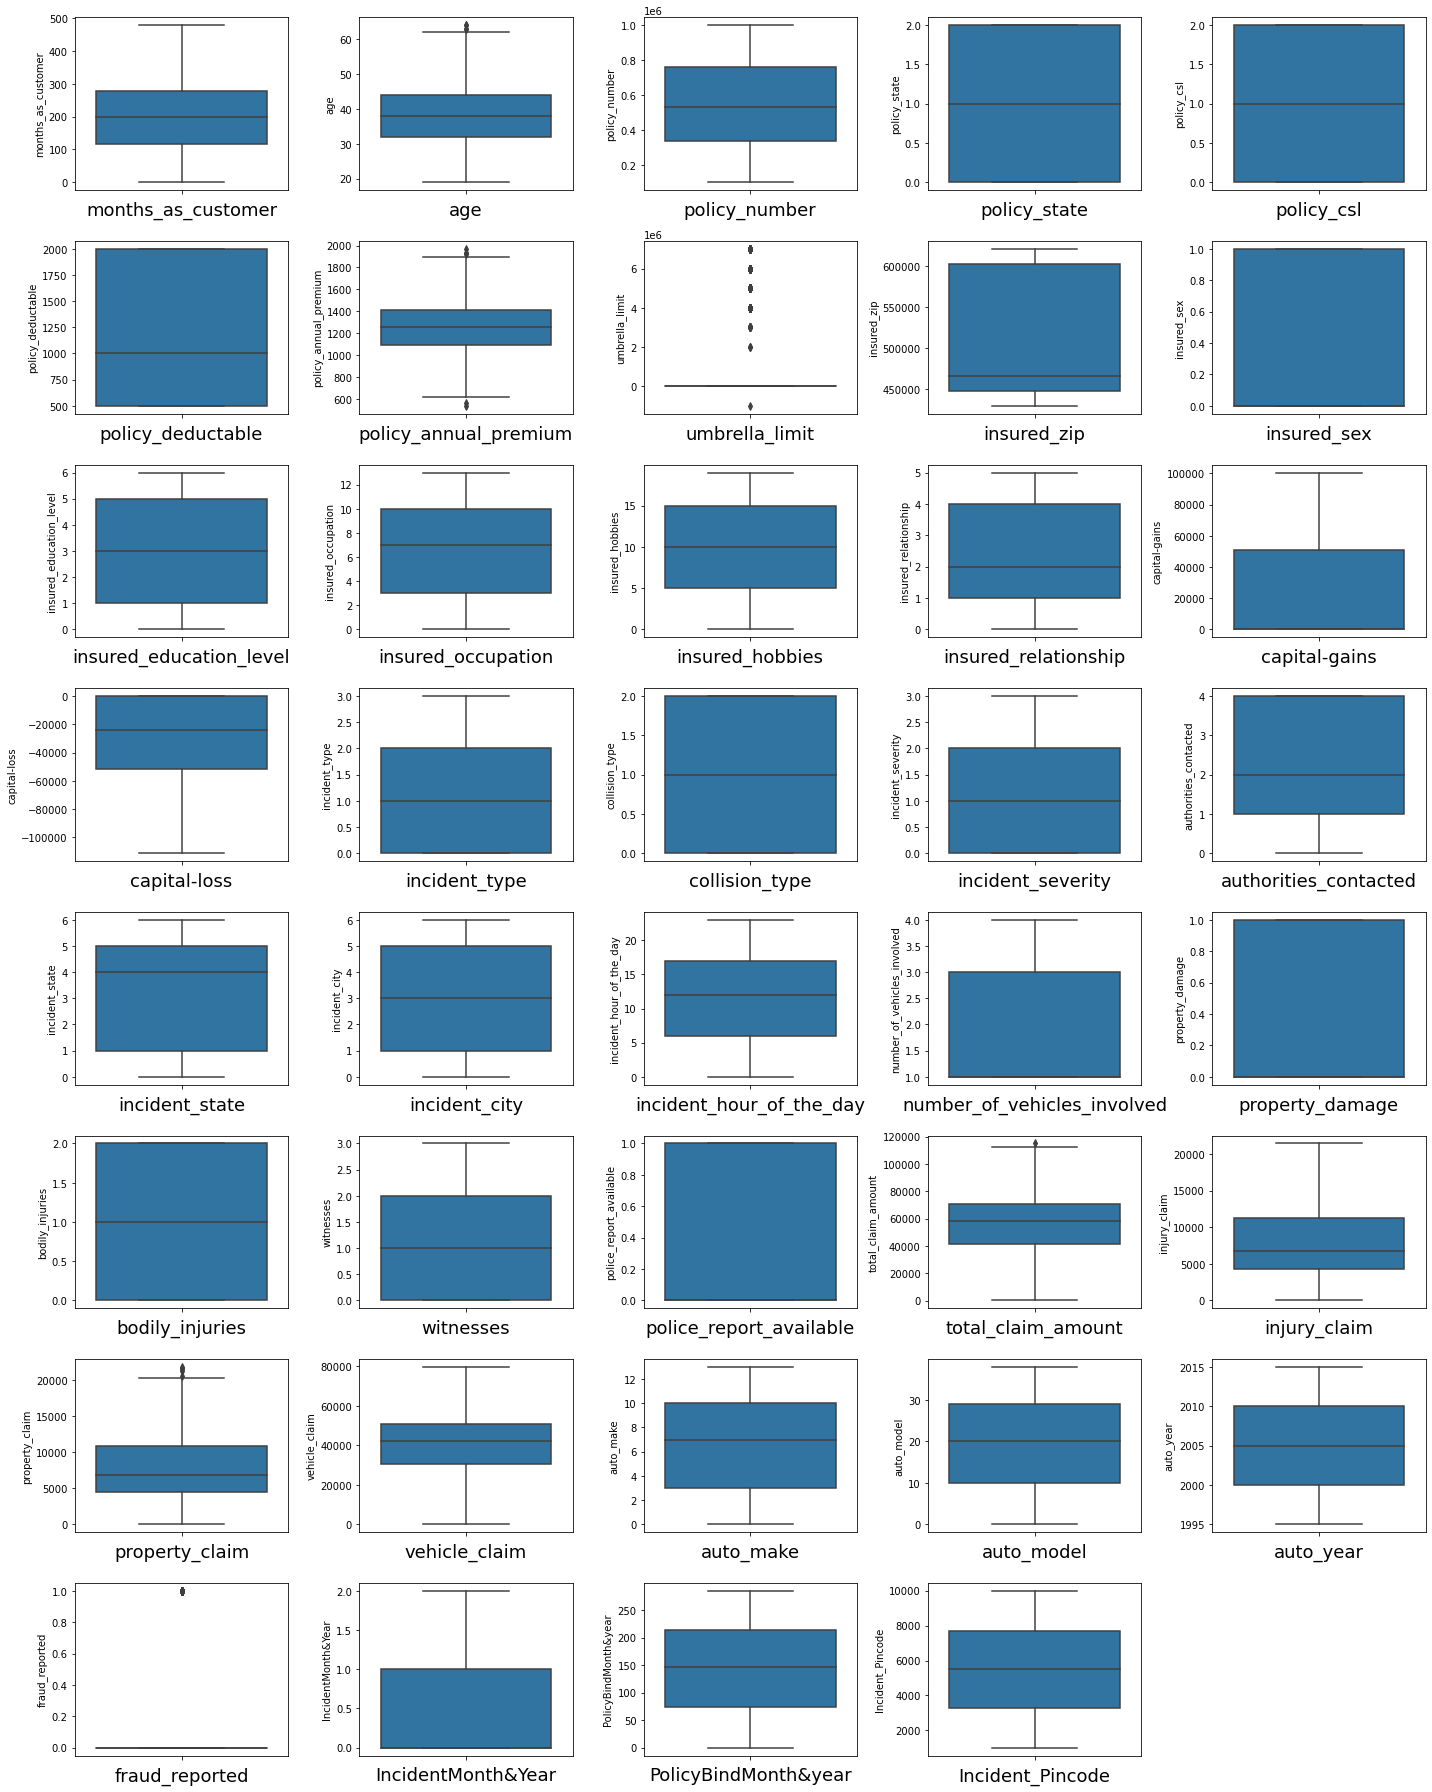

In [119]:
# Let' see outliers are removed in columns or not.
print('===========')
print('Box Plot :-')
print('===========')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=40:
        ax = plt.subplot(8,5, plotnumber)
        sns.boxplot(y=df[column]) # It is the axis for vertical set as y
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

In [120]:
df.shape # Here we check shape of remaining data after removal of outliers.

(981, 39)

#### Outliers are removed

### Spliting Dataset into features and label

In [121]:
x = df.drop('fraud_reported', axis = 1)
y = df. fraud_reported
print('Data has been splited')

Data has been splited


-----------------
Scatter Plot :-
-----------------


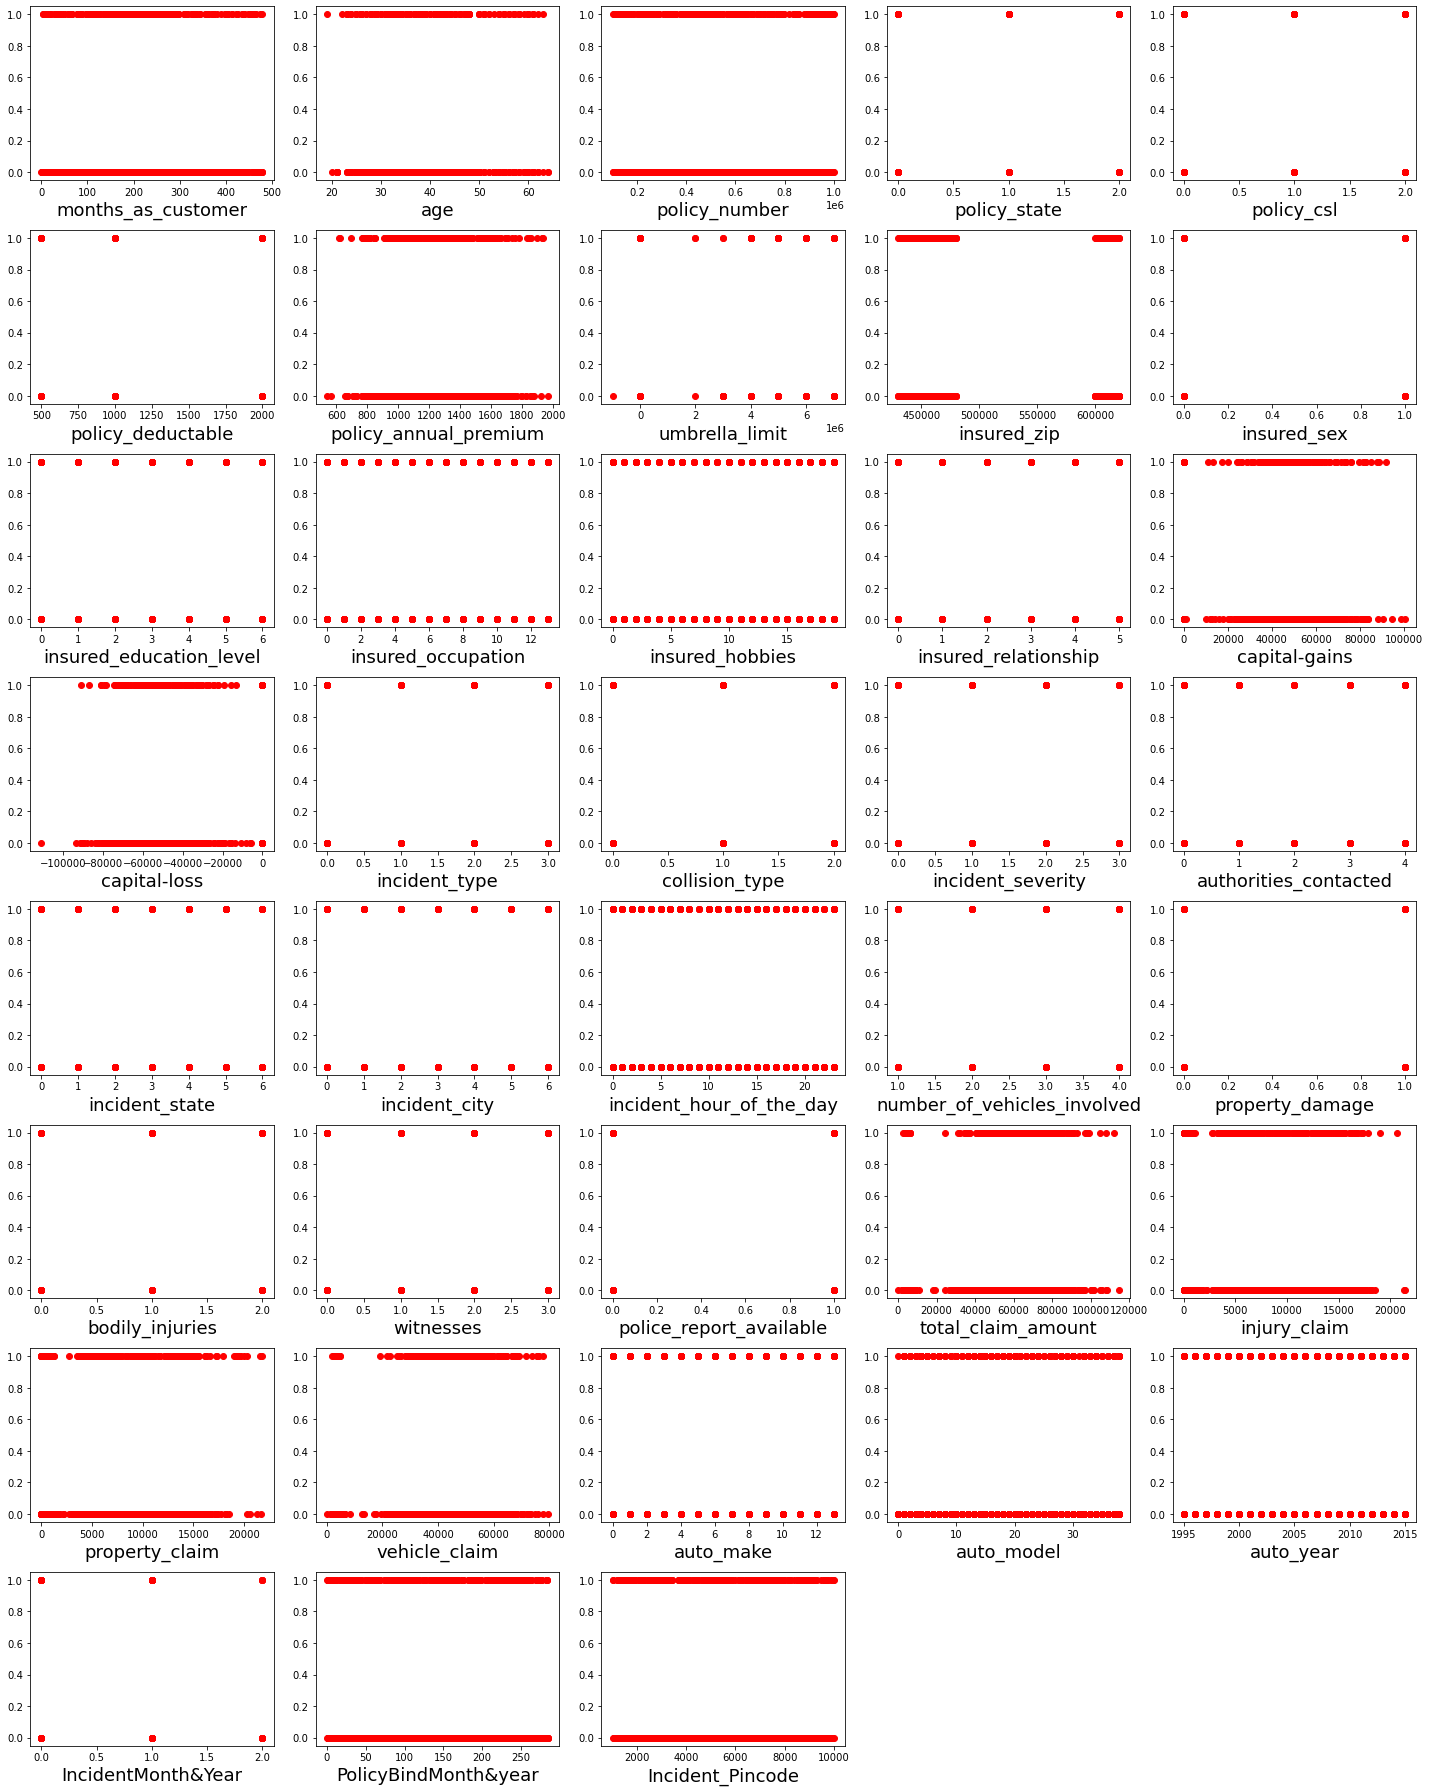

In [122]:
# Let' see relation between features and label.
print('-----------------')
print('Scatter Plot :-')
print('-----------------')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=40:
        ax = plt.subplot(8,5, plotnumber)
        plt.scatter(x[column],y, c = 'r')
        plt.xlabel(column, fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### Positive relation in feature and label

### Checking for class imbalance

In [123]:
df['fraud_reported'].value_counts()

0.0    741
1.0    240
Name: fraud_reported, dtype: int64

#### Class are not balance

### Handling Class Imbalance

In [124]:
sm = SMOTE()
x_over, y_over = sm.fit_resample(x,y)

In [125]:
print('---------------------')
print('Class are balanced :-')
print('---------------------')
print(y_over.value_counts())
print('---------------------')

---------------------
Class are balanced :-
---------------------
0.0    741
1.0    741
Name: fraud_reported, dtype: int64
---------------------


### Data Scaling

In [170]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.68475992, 0.64444444, 0.4682467 , ..., 0.        , 0.82807018,
        0.99409537],
       [0.47599165, 0.51111111, 0.26936974, ..., 0.        , 0.47368421,
        0.62344029],
       [0.27974948, 0.22222222, 0.65309788, ..., 0.5       , 0.69122807,
        0.68059269],
       ...,
       [0.27139875, 0.33333333, 0.90995303, ..., 0.        , 0.13333333,
        0.73718806],
       [0.95615866, 0.95555556, 0.48199539, ..., 0.5       , 0.90175439,
        0.56996435],
       [0.9519833 , 0.91111111, 0.50663287, ..., 0.5       , 0.85263158,
        0.04500891]])

#### Data has been scaled

### Split data into train and test. Model will be bulit on training data and tested on test data

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## Model Bulding

### Decision Tree model instantiaing, training and evaluating

In [172]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [173]:
bag_dt.oob_score

True

In [174]:
bag_dt.fit(x_train, y_train)
print('Bagging DT score ------->', bag_dt.score(x_test, y_test))

Bagging DT score -------> 0.8598382749326146


In [175]:
y_pred = bag_dt.predict(x_test)

In [176]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       191
         1.0       0.87      0.83      0.85       180

    accuracy                           0.86       371
   macro avg       0.86      0.86      0.86       371
weighted avg       0.86      0.86      0.86       371

------------------------------------------------------------



#### Conclusion : Decision Tree model has 86% score

### Cross Validation score to check if the model is overfitting

In [177]:
cv = cross_val_score(bag_dt, x, y, cv = 5)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.8318398425359993


#### Conclusion : Decision Tree model has 83% Cross Validation score

### ROC, AUC Curve

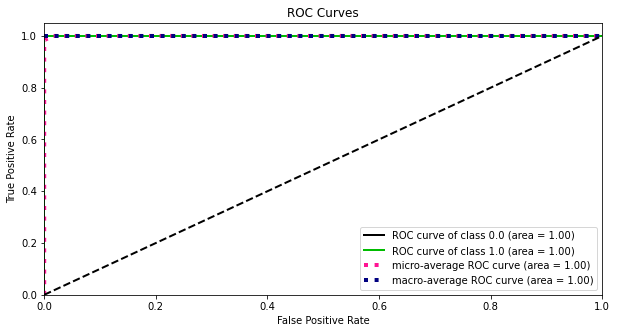

In [178]:
prob = bag_dt.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### XGBoost model instantiaing, training and evaluating

In [179]:
bag_xgb = BaggingClassifier(xgb.XGBClassifier(eval_metric = 'mlogloss'), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [180]:
bag_xgb.oob_score

True

In [181]:
bag_xgb.fit(x_train, y_train)
print('Bagging XGBoost score ------->', bag_xgb.score(x_test, y_test))

Bagging XGBoost score -------> 0.8814016172506739


In [182]:
y_pred = bag_xgb.predict(x_test)

In [183]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       191
         1.0       0.86      0.90      0.88       180

    accuracy                           0.88       371
   macro avg       0.88      0.88      0.88       371
weighted avg       0.88      0.88      0.88       371

------------------------------------------------------------



#### Conclusion : XGBoost model has 88% score

### Cross Validation score to check if the model is overfitting

In [184]:
cv = cross_val_score(bag_xgb, x, y, cv = 5)
print('Cross Validation score of XGBoost model --->', cv.mean())

Cross Validation score of XGBoost model ---> 0.8256863151351912


#### Conclusion : XGBoost model has 82% Cross Validation score

### ROC, AUC Curve

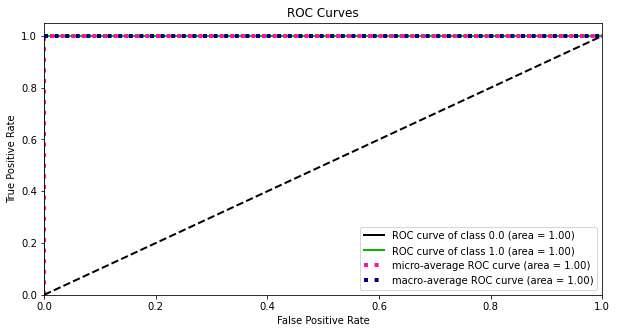

In [141]:
prob = bag_xgb.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Knn model instantiaing, training and evaluating

In [185]:
bag_Knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 5), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [186]:
bag_Knn.oob_score

True

In [187]:
bag_Knn.fit(x_train, y_train)
print('Bagging KNN score ------->', bag_Knn.score(x_test, y_test))

Bagging KNN score -------> 0.6630727762803235


In [188]:
y_pred = bag_dt.predict(x_test)

In [189]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       191
         1.0       0.87      0.83      0.85       180

    accuracy                           0.86       371
   macro avg       0.86      0.86      0.86       371
weighted avg       0.86      0.86      0.86       371

------------------------------------------------------------



#### Conclusion : KNN model has 86% score

### Cross Validation score to check if the model is overfitting

In [190]:
cv = cross_val_score(bag_Knn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.7451362270796643


#### Conclusion : Knn model has 74% Cross Validation score

### ROC, AUC Curve

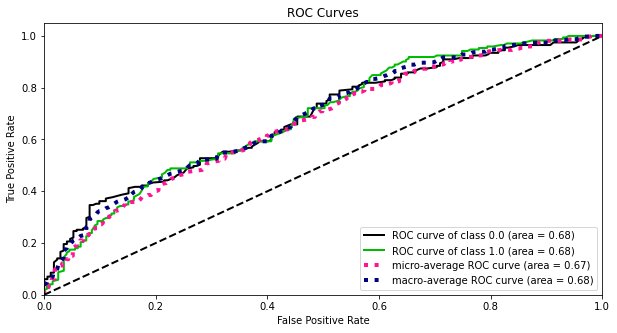

In [148]:
prob = bag_Knn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Random Forest model instantiaing, training and evaluating

In [191]:
bag_Rn = BaggingClassifier(RandomForestClassifier(), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [192]:
bag_Rn.oob_score

True

In [193]:
bag_Rn.fit(x_train, y_train)
print('Bagging Random Forest score ------->', bag_Rn.score(x_test, y_test))

Bagging Random Forest score -------> 0.8706199460916442


In [194]:
y_pred = bag_Rn.predict(x_test)

In [195]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       191
         1.0       0.87      0.87      0.87       180

    accuracy                           0.87       371
   macro avg       0.87      0.87      0.87       371
weighted avg       0.87      0.87      0.87       371

------------------------------------------------------------



#### Conclusion : Random Forest model has 87% score

### Cross Validation score to check if the model is overfitting

In [196]:
cv = cross_val_score(bag_Rn, x, y, cv = 5)
print('Cross Validation score of Rn model --->', cv.mean())

Cross Validation score of Rn model ---> 0.7573604060913706


#### Conclusion : Random Forest model has 75% Cross Validation score

### ROC, AUC Curve

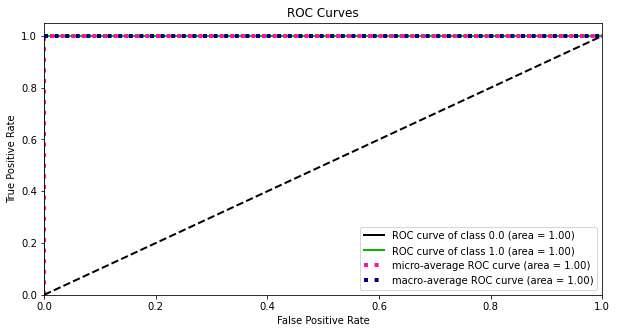

In [155]:
prob = bag_Rn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Logistic Regression model instantiaing, training and evaluating

In [197]:
bag_Lr = BaggingClassifier(LogisticRegression(), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [198]:
bag_Lr.oob_score

True

In [199]:
bag_Lr.fit(x_train, y_train)
print('Bagging Logostic Regression score ------->', bag_Lr.score(x_test, y_test))

Bagging Logostic Regression score -------> 0.5498652291105122


In [200]:
y_pred = bag_Lr.predict(x_test)

In [201]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.52      0.54       191
         1.0       0.53      0.58      0.55       180

    accuracy                           0.55       371
   macro avg       0.55      0.55      0.55       371
weighted avg       0.55      0.55      0.55       371

------------------------------------------------------------



#### Conclusion : Logistic Regression model has 55% score

### Cross Validation score to check if the model is overfitting

In [202]:
cv = cross_val_score(bag_Lr, x, y, cv = 5)
print('Cross Validation score of Logistic regression model --->', cv.mean())

Cross Validation score of Logistic regression model ---> 0.7553506681860561


#### Conclusion : Logistic Regression model has 75% Cross Validation score

### ROC, AUC Curve

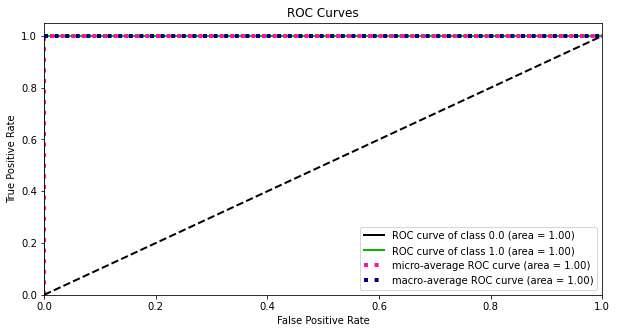

In [203]:
prob = bag_Lr.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Let's find ROC, AUC score

In [205]:
# DecisionTreeClassifier
roc_auc_score(y_test, bag_dt.predict(x_test))

0.8590750436300175

In [206]:
# XGBoostClassifier
roc_auc_score(y_test, bag_xgb.predict(x_test))

0.881937172774869

In [207]:
# KNeighborsClassifier
roc_auc_score(y_test, bag_Knn.predict(x_test))

0.6660558464223385

In [208]:
# RandomForestClassifier
roc_auc_score(y_test, bag_Rn.predict(x_test))

0.8705061082024432

In [209]:
# LogisticRegressionClassifier
roc_auc_score(y_test, bag_Lr.predict(x_test))

0.5506689936009308

### Let's check ROC, AUC Curve for the fitted model

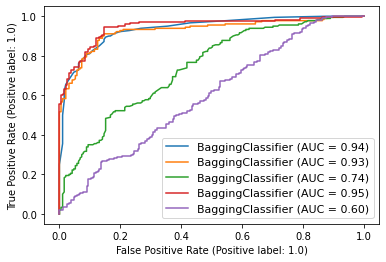

In [210]:
dis = plot_roc_curve(bag_dt, x_test, y_test)
plot_roc_curve(bag_Rn, x_test, y_test, ax = dis.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve(bag_Knn, x_test, y_test, ax = dis.ax_)
plot_roc_curve(bag_xgb, x_test, y_test, ax = dis.ax_)
plot_roc_curve(bag_Lr, x_test, y_test, ax = dis.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

### Looking ROC, AUC Curve we found Random Forest has best model so we do Hyperparameter Tuning on it.

In [213]:
param = {'n_estimators': [50,100], 'max_samples': [1.0], 'bootstrap': [True]}

In [216]:
grid_search = GridSearchCV(estimator = bag_Rn, param_grid = param, cv = 5 , n_jobs = -1)

In [217]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         max_samples=0.5, n_estimators=30,
                                         oob_score=True, random_state=3),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_samples': [1.0],
                         'n_estimators': [50, 100]})

In [218]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 50}


In [219]:
hRn = BaggingClassifier(base_estimator=RandomForestClassifier(),max_samples = 1.0, bootstrap = True , n_estimators = 50)
hRn.fit(x_train, y_train)
hRn.score(x_test, y_test)

0.8679245283018868

In [220]:
y_pred = hRn.predict(x_test)

In [221]:
print('--------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

--------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       191
         1.0       0.86      0.87      0.87       180

    accuracy                           0.87       371
   macro avg       0.87      0.87      0.87       371
weighted avg       0.87      0.87      0.87       371

------------------------------------------------------------



#### After Hyperparameter Tuning model accuracy score 87%.

### Saving The Model

In [222]:
# saving the model to the Local file system
filename = 'Insurance Claims Fraud Detection.pickle'
pickle.dump(hRn, open(filename, 'wb'))

### Predict Insurance Claims Fraud Detection

In [223]:
model = pickle.load(open('Insurance Claims Fraud Detection.pickle', 'rb'))
result = model.score(x_test, y_test)
print('Predicted Score --------->', result)

Predicted Score ---------> 0.8679245283018868


In [224]:
Prediction = pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Orginal'])
Prediction

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370
Predicted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
Orginal,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0

### Saving the predicted result in CSV file

In [225]:
Prediction.to_csv('Insurance Claims Fraud Detection.csv')

## Final Conclusion : Random Forest is our best model.